HIPOTESIS EDA:

EN ESTE EDA SE QUIERE DEMOSTRAR QUE LAS POLITICAS DE IZQUIERDAS Y GLOBALISTAS, COMO LAS POLITICAS DE LA UNION EUROPEA, QUE SE REFLEJAN EN INDICADORES, QUE SON CONSECUENCIA DE LA EMISION DESENFRENADA DE DEUDA Y EL AUMENTO FISCAL, TIENEN UN EFECTO NEGATIVO EN LOS VALORES ÉTICOS, SALUD TANTO FÍSICA Y MENTAL,
ADEMAS DE REPERCUTIR EN EL PRESTIGIO DADO POR LA CIUDADANIA ACTIVA AL LOBBY POLÍTICO Y ORGANISMOS QUE REPRESENTAN AL SISTEMA ,(Cuerpo policial, organismos internacionales, Eurodiputados, etc.)
EN ESTE CASO EL ESTUDIO SOLO SE CENTRARA EN LA EUROZONA. Y MAS DETALLADAMENTE EN SUBGRUPOS DE PAISES QUE TIENEN PARECIDOS EN LAS CARACTERISTICAS ECONOMICAS, CULTURALES Y CON CIERTA CERCANIA GEOGRAFICA.


EN RESUMEN SE DEMOSTRARA LA RELACION POSITIVA ENTRE LA INFLACION, EL BAJO SUELDO BRUTO MENSUAL MEDIO DEL PAIS, EL PIB PER CAPITA Y CONDUCTAS NEGATIVAS PARA EL SISTEMA DE LA CIUDADANIA.

PLANTEAMIENTO:
Para ello haremos una división de nuestro dataset basandonos en la inflación, sueldo bruto mensual medio y pib per capita, para crear subgrupos que tengan similitudes socioeconomicas, compararemos los datos respecto a la Eurozona en general. Haremos un trabajo de etiquetación ademas de proponer varias variables de diferente campo semantico como targets.

Preparacion de datos:
Vamos a preparar los dataframes, descargandolos de la base de datos sql "database9k.db"

In [1]:
import os
from dotenv import load_dotenv
#Configuramos el directorio raiz a traves de la variable proyecto raiz de .env

load_dotenv()  # Lee el archivo .env
ruta_raiz = os.environ.get('RAIZ_PROYECTO')  
ruta_carpeta = os.path.join(ruta_raiz, 'data', 'src')
os.makedirs(ruta_carpeta, exist_ok=True)

In [2]:
#1) Creacion de Subgrupos de paises:
import pandas as pd
from sqlalchemy import create_engine, text
import os
import sqlite3
#1.1 Nos conectamos a la base de datos.
database_path = os.path.abspath("C:/GitHubRepos/ProyectoFinal/data/processed/Dataset9k.db")
print(f"Database path: {database_path}")
conn = create_engine(f'sqlite:///{database_path}')
# Execute the SQL query, ya hemos visto en el visualizador de sql que los datos que deberian ser numericos hay algunas columnas que son formato texto, 
# hacemos un query para transformarlos justo antes de almacenarlos en un dataframe

#DF inflacion
query = """
SELECT País, REPLACE(Inflación, ',', '.') AS Inflación_Float
FROM EuroInfl
"""
#Creamos un diccionario para almacenar la conversion
dtype_dict = {'Inflación_Float': float}
# Load the DataFrame with the dtype dictionary
df_inf = pd.read_sql_query(query, conn, dtype=dtype_dict)
df_inf.drop_duplicates(subset='País', keep='first', inplace=True)

#DF PPC
query = f"""
SELECT País, ROUND(PPC) AS PPC_INTEGER
FROM EuroPPC
"""
df_PPC = pd.read_sql_query(query, conn)
df_PPC.drop_duplicates(subset='País', keep='first', inplace=True)
print(df_PPC)

#DF SBMM
query = """
SELECT País, REPLACE(SBMM, ',', '.') AS SBMM_Float
FROM EuroSBMM
"""
dtype_dict = {'SBMM': float}
df_SBMM = pd.read_sql_query(query, conn)
df_SBMM.drop_duplicates(subset='País', keep='first', inplace=True)
df_SBMM['País'] = df_SBMM['País'].str.strip().str.lower()

conn.dispose()
print(df_SBMM)


Database path: C:\GitHubRepos\ProyectoFinal\data\processed\Dataset9k.db
                  País  PPC_INTEGER
0        Unión Europea         41.0
1             Bulgaria         16.0
2              Rumania         18.0
3              Croacia         22.0
4              Polonia         22.0
5              Hungría         22.0
6              Letonia         23.0
7               Grecia         23.0
8   República Eslovaca         24.0
9             Portugal         27.0
10            Lituania         28.0
11             Estonia         30.0
12     República Checa         32.0
13           Eslovenia         33.0
14              España         34.0
15              Chipre         37.0
16              Italia         39.0
17               Malta         40.0
18             Francia         45.0
19           Finlandia         53.0
20            Alemania         54.0
21             Bélgica         55.0
22              Suecia         56.0
23             Austria         56.0
24        Países Bajos      

In [3]:
#No hay forma de cambiar la columna paises de la tabla SBMM, por lo que habra que realizar un diccionario de equivalencias para hacer coincidir la columna paises en los tres
#Dataframes de graficos, realizaremos posteriormente una clusterizacion para elegir 3 subgrupos de paises con economias similares y poder compararlos
#A nivel general con la Union Europea.
país_equivalencias = {
    'bulgaria :bg:': 'Bulgaria',
    'rumanía :ro:': 'Rumania',
    'hungría :hu:': 'Hungría',
    'croacia :hr:': 'Croacia',
    'polonia :pl:': 'Polonia',
    'letonia :lv:': 'Letonia',
    'eslovaquia :sk:': 'República Eslovaca',
    'grecia :gr:': 'Grecia',
    'lituania :lt:': 'Lituania',
    'estonia :ee:': 'Estonia',
    'portugal :pt:': 'Portugal',
    'república checa :cz:': 'República Checa',
    'malta :mt:': 'Malta',
    'chipre :cy:': 'Chipre',
    'eslovenia :si:': 'Eslovenia',
    'españa :es:': 'España',
    'italia :it:': 'Italia',
    'media ue :eu:': 'Unión Europea',
    'francia :fr:': 'Francia',
    'suecia :se:': 'Suecia',
    'finlandia :fi:': 'Finlandia',
    'austria :at:': 'Austria',
    'países bajos :nl:': 'Países Bajos',
    'bélgica :be:': 'Bélgica',
    'irlanda :ie:': 'Irlanda',
    'alemania :de:': 'Alemania',
    'dinamarca :dk:': 'Dinamarca',
    'luxemburgo :lu:': 'Luxemburgo',
}
df_SBMM['País'] = df_SBMM['País'].map(país_equivalencias)
print(df_SBMM)

                  País SBMM_Float
0           Luxemburgo       3713
1            Dinamarca       3573
2             Alemania       3148
3              Irlanda       3051
4              Bélgica       3007
5              Austria       2964
6         Países Bajos       2964
7            Finlandia       2678
8               Suecia       2604
9              Francia       2574
10       Unión Europea       2194
11              Italia       2174
12              España       1822
13           Eslovenia       1503
14              Chipre       1359
15               Malta       1354
16     República Checa       1208
17            Portugal       1154
18             Estonia       1123
19            Lituania       1110
20              Grecia       1049
21  República Eslovaca       1046
22             Letonia        978
23             Polonia        941
24             Croacia        903
25             Hungría        852
26             Rumania        796
27            Bulgaria        650


In [4]:
#Antes de la concatenacion de los dataframe hemos de hacer coincidir el tipo de datos, coincidir el index 

df_inf.reset_index(drop=True, inplace=True)
print(df_inf['País'].dtype)
print(df_inf['Inflación_Float'].dtype)
print(df_inf)

object
float64
                  País  Inflación_Float
0            Dinamarca             -3.8
1        Unión Europea              6.4
2           Luxemburgo              3.4
3              Irlanda              3.6
4               Chipre              3.8
5            Finlandia              3.9
6              Bélgica              4.5
7              Francia              5.3
8                Malta              5.3
9               Italia              5.8
10              Grecia              5.9
11            Alemania              6.1
12              Suecia              6.1
13              España              6.2
14             Letonia              6.4
15             Austria              6.6
16            Portugal              6.9
17        Países Bajos              7.3
18            Bulgaria              8.0
19             Estonia              8.1
20     República Checa              8.2
21            Lituania              9.0
22             Polonia              9.5
23           Eslovenia   

In [5]:
#df_PPC dtypes
df_PPC.reset_index(drop=True, inplace=True)
print(df_PPC['País'].dtype)
print(df_PPC['PPC_INTEGER'].dtype)

object
float64


In [6]:
#df_SBMM
df_SBMM.reset_index(drop=True, inplace=True)
print(df_SBMM['País'].dtype)
print(df_SBMM['SBMM_Float'].dtype)
#Aqui tenemos el problema, hemos de pasar la columna SBMM_FLoat a float64
df_SBMM['SBMM_Float'] = df_SBMM['SBMM_Float'].astype('float64')
print(df_SBMM['SBMM_Float'].dtype)

object
object
float64


In [7]:
#Preparamos el dataframe concatenado filtrando por valores unicos de paises y sus valores numericos en cada uno de los dataframes.
# Encontrar países comunes
paises_comunes = set(df_inf['País']).intersection(set(df_PPC['País']), set(df_SBMM['País']))

# Filtrar DataFrames para países comunes y establecer 'País' como índice
df_i1 = df_inf[df_inf['País'].isin(paises_comunes)].set_index('País')
df_P1 = df_PPC[df_PPC['País'].isin(paises_comunes)].set_index('País')
df_S1 = df_SBMM[df_SBMM['País'].isin(paises_comunes)].set_index('País')
# Concatenar los DataFrames por columnas
df_IPS = pd.concat([df_i1, df_P1, df_S1], axis=1)
#Eliminamos variables usadas que no son inutiles.
df_IPS.to_csv('C:/GitHubRepos/ProyectoFinal/data/processed/EuEco.csv', index=True)
del df_i1, df_P1, df_S1, df_inf, df_SBMM, df_PPC, país_equivalencias, dtype_dict, paises_comunes, df_IPS
df1= pd.read_csv('C:\GitHubRepos\ProyectoFinal\data\processed\EuEco.csv')
print(df1)


                  País  Inflación_Float  PPC_INTEGER  SBMM_Float
0            Dinamarca             -3.8         68.0      3573.0
1        Unión Europea              6.4         41.0      2194.0
2           Luxemburgo              3.4        129.0      3713.0
3              Irlanda              3.6        104.0      3051.0
4               Chipre              3.8         37.0      1359.0
5            Finlandia              3.9         53.0      2678.0
6              Bélgica              4.5         55.0      3007.0
7              Francia              5.3         45.0      2574.0
8                Malta              5.3         40.0      1354.0
9               Italia              5.8         39.0      2174.0
10              Grecia              5.9         23.0      1049.0
11            Alemania              6.1         54.0      3148.0
12              Suecia              6.1         56.0      2604.0
13              España              6.2         34.0      1822.0
14             Letonia   

<>:14: SyntaxWarning: invalid escape sequence '\G'
<>:14: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\760774386.py:14: SyntaxWarning: invalid escape sequence '\G'
  df1= pd.read_csv('C:\GitHubRepos\ProyectoFinal\data\processed\EuEco.csv')


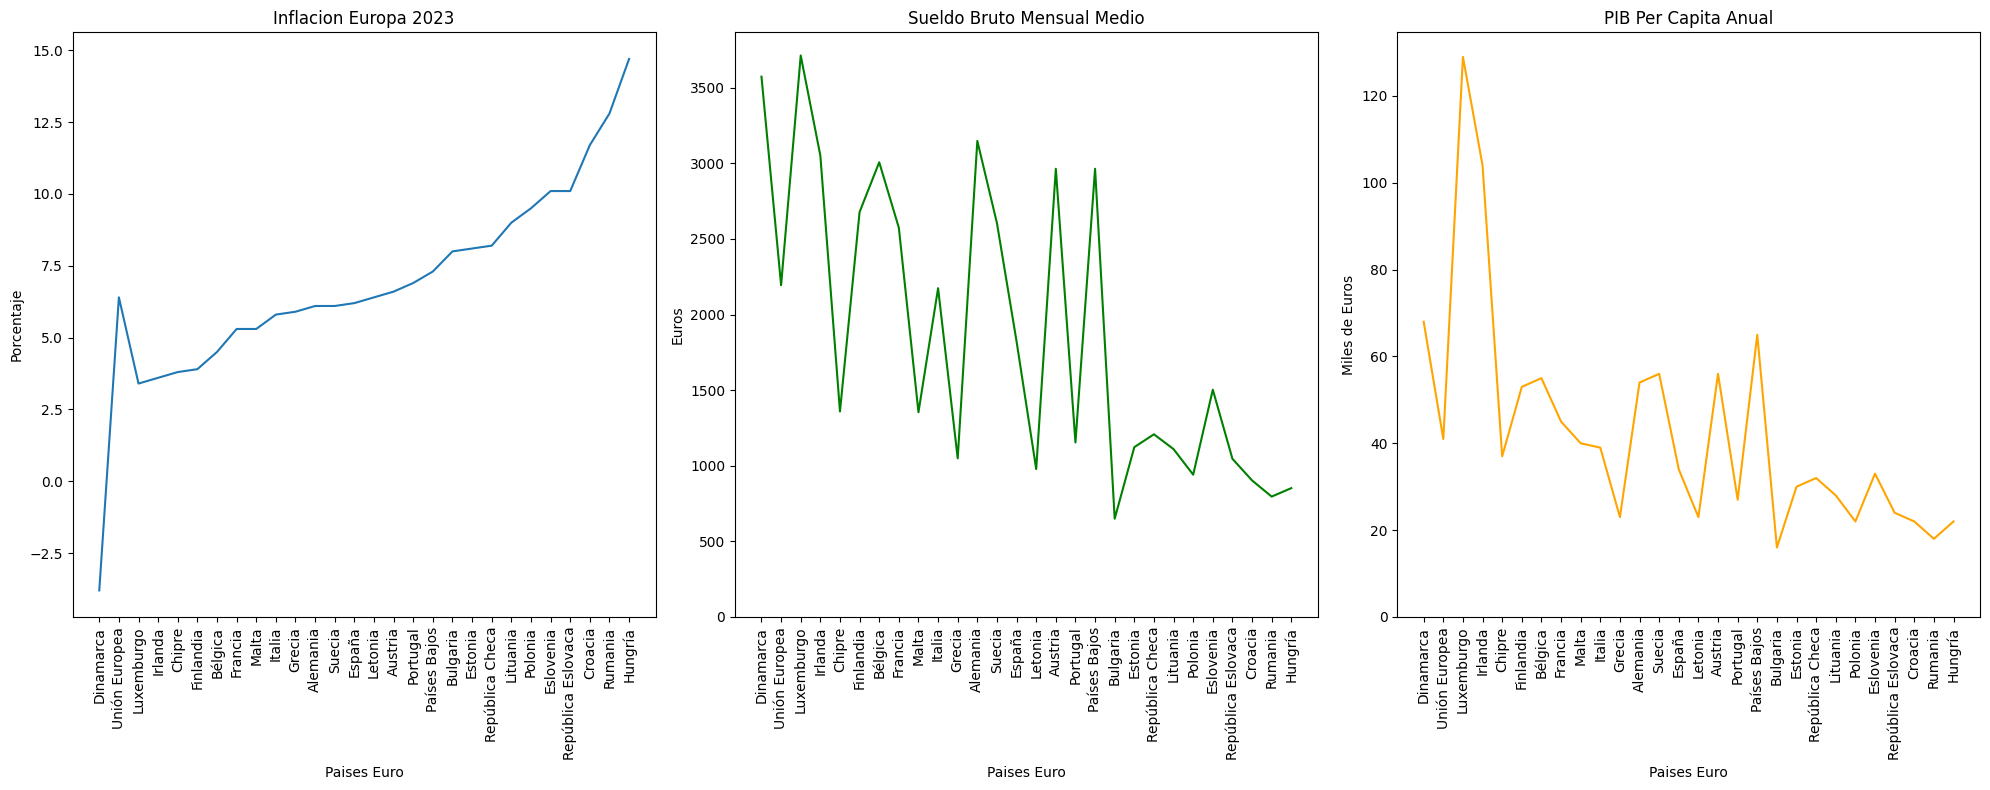

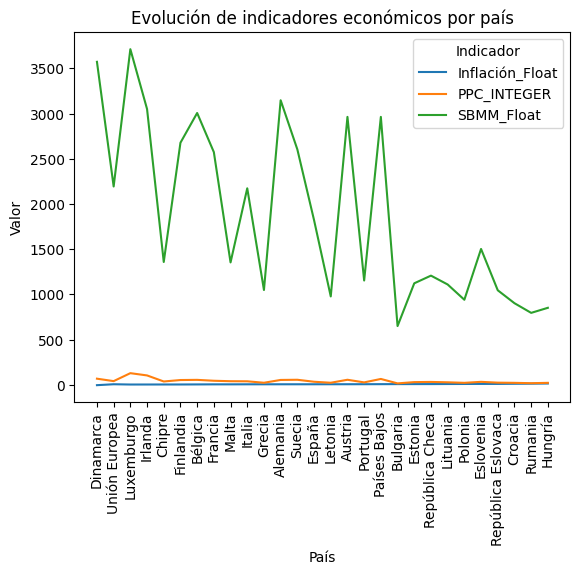

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#1.5 Representacion Graficos Economicos.
# Crear una grupo de graficos lineales con 3 subplots en una fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
# Graficar cada DataFrame en un subplot diferente
axes[0].plot(df1['País'], df1['Inflación_Float'])
axes[0].set_title('Inflacion Europa 2023')
axes[0].set_xlabel('Paises Euro')
axes[0].set_ylabel('Porcentaje')
axes[0].tick_params(axis='x', rotation=90)  

axes[1].plot(df1['País'], df1['SBMM_Float'], color='Green')
axes[1].set_title('Sueldo Bruto Mensual Medio')
axes[1].set_xlabel('Paises Euro')
axes[1].set_ylabel('Euros')
axes[1].set_ylim(ymin=0) 
axes[1].tick_params(axis='x', rotation=90)  

axes[2].plot(df1['País'], df1['PPC_INTEGER'],  color='Orange')
axes[2].set_title('PIB Per Capita Anual')
axes[2].set_xlabel('Paises Euro')
axes[2].set_ylabel('Miles de Euros')
axes[2].set_ylim(ymin=0)  
axes[2].tick_params(axis='x', rotation=90) 
plt.tight_layout()
plt.show()
df1.set_index('País', inplace=True)
for column in ['Inflación_Float', 'PPC_INTEGER', 'SBMM_Float']:
    sns.lineplot(data=df1, x=df1.index, y=column, label=column)
plt.title('Evolución de indicadores económicos por país')
plt.xlabel('País')
plt.ylabel('Valor')
plt.legend(title='Indicador')
plt.xticks(rotation=90)

plt.show()
del axes


In [9]:
#Ahora vamos a crear 3 subgrupos de paises: 
#Los haremos automaticamente con KMeans, podemos predecir los grupos
#por las caracteristicas economicas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

X = df1[['Inflación_Float', 'PPC_INTEGER', 'SBMM_Float']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df1['cluster'] = kmeans.labels_
fig = px.scatter_3d(df1, x='Inflación_Float', y='PPC_INTEGER', z='SBMM_Float',
              color='cluster',
              opacity=0.7,
              color_continuous_scale='viridis',
              symbol='cluster',
              size_max=18)
fig.update_layout(
    title='Clustering de países en 3D',
    scene = dict(
        xaxis_title='Inflación',
        yaxis_title='PPC',
        zaxis_title='SBMM'
    ),
    legend=dict(
        title='Cluster',
        yanchor="top",
        xanchor="right"
    )
)

fig.show()

In [10]:
#Ahora llamamos a los valores unicos del indice default del df1 que se agrupan en cada cluster para seleccionar ademas 
#del criterio matematico, razones geograficas y culturales.

for i in range(kmeans.n_clusters):
    cluster_i = df1[df1['cluster'] == i].index
    print(f"Países en el cluster {i}:")
    print(cluster_i.tolist())
del df1, X

Países en el cluster 0:
['Dinamarca', 'Luxemburgo', 'Irlanda', 'Finlandia', 'Bélgica', 'Francia', 'Alemania', 'Suecia', 'Austria', 'Países Bajos']
Países en el cluster 1:
['Chipre', 'Malta', 'Grecia', 'Letonia', 'Portugal', 'Bulgaria', 'Estonia', 'República Checa', 'Lituania', 'Polonia', 'Eslovenia', 'República Eslovaca', 'Croacia', 'Rumania', 'Hungría']
Países en el cluster 2:
['Unión Europea', 'Italia', 'España']


Seleccionaremos 2 paises por grupo:
GRUPO A(Economicamente mas rico.):  Alemania, Paises Bajos.
GRUPO B(Economicamente similar a la media, tomaremos como referencia España e Italia): UE, España, Italia.
Nuestro dataset principal no tiene muestras especificas de la Media de la UE.
GRUPO C(Economicamente inferior a la media.): Hungría, Bulgaria.

2) EXPLORACION DE DATOS Y ANÁLISIS:
AL SER DATOS CATEGÓRICOS FACTORIZADOS NO TENDREMOS PROBLEMAS DE OUTLIERS. CADA PARTE DEL EDA TENDRA SUBDIVISIONES.
ACORDEMONOS QUE NUESTRO DATASET PRINCIPAL, SUS VARIABLES CATEGORICAS ESTAN AGRUPADAS POR 4 GRANDES BLOQUES
[Bloque 1(Medios de informacion),Bloque 2(Político),Bloque 3(Bienestar Social), Bloque 4(Valores personales)] CON UN TOTAL DE 57 VARIABLES. CON MUESTRAS DE TODOS LOS PAISES DE LA ZONA EURO, UNAS 100MIL FILAS DE MUESTRAS.
ALGO MAS DE 9K MUESTRAS POR PAIS.
Ademas hay muestras de paises fuera de la UNion Europea pero estrechamente relacionados con Europa por proximidad geografica y relaciones socioeconomicas.

In [11]:
#Almacenamos dataset principal, y datasets de GRUPO A,B,C en un csv para mejor manejo.(dfeu,dfA,dfB,dfC)
import numpy as np
from numpy import random
rng = random.seed(42)
database_path = os.path.abspath("C:/GitHubRepos/ProyectoFinal/data/processed/Dataset9k.db")
print(f"Database path: {database_path}")
conn = create_engine(f'sqlite:///{database_path}')
query = "SELECT * FROM ZonaEuroESS"
dfZES = pd.read_sql(query, conn)
conn.dispose()


Database path: C:\GitHubRepos\ProyectoFinal\data\processed\Dataset9k.db


In [12]:
# factorizaremos la columna paises y la aañadiremos al dataset
'''import json
import os
from sklearn.preprocessing import LabelEncoder
def JsonFCZRename(df, categorical_cols, output_dir, suffix="_fc"):
    for col in categorical_cols:
        le = LabelEncoder()
        df[col + suffix] = le.fit_transform(df[col]) 
        mapping_dict = {value: str(index) for value, index in zip(le.classes_, le.transform(le.classes_))}
        print(f"Column: {col}")
        print(mapping_dict)
        filename = f"{col}_factors.json"
        filepath = os.path.join(output_dir, filename)
        with open(filepath, 'w') as f:
            json.dump(mapping_dict, f, indent=4)

    return df
categorical_cols = ['cntry']
JsonFCZRename(dfZES, categorical_cols, '\GitHubRepos\ProyectoFinal\data\processed')
NO HACE FALTA FACTORIZAR, YA ESTA FACTORIZADO.'''


<>:2: SyntaxWarning:

invalid escape sequence '\G'

<>:2: SyntaxWarning:

invalid escape sequence '\G'

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1067335129.py:2: SyntaxWarning:

invalid escape sequence '\G'



'import json\nimport os\nfrom sklearn.preprocessing import LabelEncoder\ndef JsonFCZRename(df, categorical_cols, output_dir, suffix="_fc"):\n    for col in categorical_cols:\n        le = LabelEncoder()\n        df[col + suffix] = le.fit_transform(df[col]) \n        mapping_dict = {value: str(index) for value, index in zip(le.classes_, le.transform(le.classes_))}\n        print(f"Column: {col}")\n        print(mapping_dict)\n        filename = f"{col}_factors.json"\n        filepath = os.path.join(output_dir, filename)\n        with open(filepath, \'w\') as f:\n            json.dump(mapping_dict, f, indent=4)\n\n    return df\ncategorical_cols = [\'cntry\']\nJsonFCZRename(dfZES, categorical_cols, \'\\GitHubRepos\\ProyectoFinal\\data\\processed\')\nNO HACE FALTA FACTORIZAR, YA ESTA FACTORIZADO.'

In [13]:
import json
import os
def agrupar_lrscale(valor):
    if 1 <= valor <= 3:
        return 'SocialComunista'
    elif 4 <= valor <= 7:
        return 'Socialdemócrata'
    else:
        return 'ExtremaDerecha'


dfZES['ideo'] = dfZES['lrscale'].apply(agrupar_lrscale)


mapping = {'SocialComunista': 1, 'Socialdemócrata': 2, 'ExtremaDerecha': 3}


dfZES['ideo_fcz'] = dfZES['ideo'].map(mapping)


ruta_archivo_json = "C:\GitHubRepos\ProyectoFinal\data\processed\ideo_factors.json"


with open(ruta_archivo_json, 'w') as f:
    json.dump(mapping, f)

print(dfZES.head())

     cntry  netusoft  nwsptot  ppltrst  rdtot  tvtot  actrolga  bctprd  \
0  Austria       5.0      1.0        8    7.0    4.0       2.0       1   
1  Austria       5.0      1.0        8    7.0    7.0       4.0       2   
2  Austria       5.0      1.0        9    2.0    4.0       2.0       2   
3  Austria       3.0      1.0        7    7.0    7.0       1.0       2   
4  Austria       5.0      0.0        2    4.0    3.0       2.0       2   

   dclagr  dclaid  ...  ipadvnta  ipcrtiva  iplylfra  ipmodsta  ipudrsta  \
0     3.0     1.0  ...       5.0       2.0       2.0       2.0       2.0   
1     3.0     1.0  ...       3.0       1.0       2.0       1.0       2.0   
2     3.0     1.0  ...       5.0       2.0       2.0       2.0       2.0   
3     3.0     1.0  ...       2.0       1.0       1.0       1.0       1.0   
4     3.0     1.0  ...       5.0       2.0       2.0       2.0       2.0   

   cntryfcz  origfcz        orig             ideo  ideo_fcz  
0         0        2       Mixto   E

<>:21: SyntaxWarning:

invalid escape sequence '\G'

<>:21: SyntaxWarning:

invalid escape sequence '\G'

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\3786404031.py:21: SyntaxWarning:

invalid escape sequence '\G'



In [14]:
#df's A,B y C
import os
import pandas as pd
ruta_carpeta = 'C:/GitHubRepos/ProyectoFinal/data/raw'
os.makedirs(ruta_carpeta, exist_ok=True)
dfeuraw = dfZES.sample(n=2700,random_state=rng)
ruta_archivo = os.path.join(ruta_carpeta, 'dfeuraw.csv')
dfeuraw.to_csv(ruta_archivo, index=False)

dffa = dfZES[dfZES['cntry'].isin(['Alemania', 'Holanda'])]
dfAraw = dffa.groupby('cntry').sample(n=1350, random_state=rng, replace=True)
ruta_archivo = os.path.join(ruta_carpeta, 'dfAraw.csv')
dfeuraw.to_csv(ruta_archivo, index=False)

dffb = dfZES[dfZES['cntry'].isin(['España', 'Italia'])]
dfBraw = dffb.groupby('cntry').sample(n=1350, random_state=rng, replace=True)
ruta_archivo = os.path.join(ruta_carpeta, 'dfBraw.csv')
dfeuraw.to_csv(ruta_archivo, index=False)

dffc = dfZES[dfZES['cntry'].isin(['Hungria', 'Bulgaria'])]
dfCraw = dffc.groupby('cntry').sample(n=1350, random_state=rng, replace=True)
ruta_archivo = os.path.join(ruta_carpeta, 'dfCraw.csv')
dfeuraw.to_csv(ruta_archivo, index=False)

del dffa, dffb, dffc, ruta_archivo

2) Primero de todo, vamos a hacer una preseleccion de variables de las que tenemos en el dataset en funcion de nuestros intereses, y el
enfoque que queremos dar a la etiquetacion del usuario final a traves de nuestra aplicacion. Y escoger una posible Var target por bloque.
Para ello miraremos el despliegue de variables del documento DataResearch.
Bloque 1(Media Trust):
dfeu['netusoft','nwsptot','ppltrst','rdtot','tvtot'] - var target local Bloque 1(media trust) ['ppltrst'] (Grado de confianza en la opinion de la  gente y medios de comunicacion, 0 no confiar nada y 10 plena confianza)
Bloque 2(Político):
dfeu['actrolga','dclcrm','dclmig','dmcntov','euftf','gincdif','ideo_fcz','imbgeco','stfgov']                                               - var target global Bloque 2 (Politica) ['ideo_fcz'] (1=socialcomunista, 2=socialdemocrata, 3=extrema derecha)
Bloque 3(Bienestar Social):
dfeu['aesfdrk','atchctr','atcherp','dscrgnd','happy','rlgdgr','sclmeet','origfcz'] - var target local Bloque 3(bienestar social) ['sclmeet'] - How often socially meet with friends, relatives or colleagues (Cuan antisocial el individuo se ha hecho como resultado, 0 antisocial, 7 social cada dia)
Bloque 4(Valores personales):
dfeu['iplylfra','impenva','impfreea','impricha','imptrada','ipmodsta','ipudrsta']      - var target local Bloque 4  ['iplylfra'] - Important to be loyal to friends and devote to people close (Como de leal eres con los que consideras amigos y con tu familia, 1 Individuo perfecto en este aspecto, 6 individuo interesado y sin palabra)

dfeu['netusoft','nwsptot','ppltrst','rdtot','tvtot','actrolga','dclcrm','dclmig','dmcntov','euftf','gincdif','ideo_fcz','imbgeco','stfgov','aesfdrk','atchctr','atcherp','dscrgnd','happy','rlgdgr','sclmeet','origfcz','iplylfra','impenva','impfreea','impricha','imptrada','ipmodsta','ipudrsta','cntry_fc']

Casi hemos reducido a la mitad el numero de variables de 57 a 30 variables.
antes de aplicar el feature engineering, gracias a la matriz de correlacion y el selectkbest podremos reducir significativamente el numero de variables.

In [15]:
#Ahora especificare la lista de variables con las que a prior voy a trabajar en el EDA antes de el selectKbest, y almacenare los csv en carpeta interim.
import os
from os import path
intcols=['netusoft','nwsptot','ppltrst','rdtot','tvtot','actrolga','dclcrm','dclmig','dmcntov','euftf','gincdif','ideo_fcz','ideo','imbgeco','stfgov','aesfdrk','atchctr','atcherp','dscrgnd','happy','rlgdgr','sclmeet','origfcz','iplylfra','impenva','impfreea','impricha','imptrada','ipmodsta','ipudrsta']
dfeu = dfeuraw[intcols]
dfA = dfAraw[intcols]
dfB = dfBraw[intcols]
dfC= dfCraw[intcols]
dfeu.to_csv('C:\GitHubRepos\ProyectoFinal\data\interim\dfCeu.csv', index=False)
dfeu.to_csv('C:\GitHubRepos\ProyectoFinal\data\interim\dfA.csv', index=False)
dfeu.to_csv('C:\GitHubRepos\ProyectoFinal\data\interim\dfB.csv', index=False)
dfeu.to_csv('C:\GitHubRepos\ProyectoFinal\data\interim\dfC.csv', index=False)
del dfeuraw, dfAraw, dfBraw, dfCraw

<>:9: SyntaxWarning:

invalid escape sequence '\G'

<>:10: SyntaxWarning:

invalid escape sequence '\G'

<>:11: SyntaxWarning:

invalid escape sequence '\G'

<>:12: SyntaxWarning:

invalid escape sequence '\G'

<>:9: SyntaxWarning:

invalid escape sequence '\G'

<>:10: SyntaxWarning:

invalid escape sequence '\G'

<>:11: SyntaxWarning:

invalid escape sequence '\G'

<>:12: SyntaxWarning:

invalid escape sequence '\G'

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\985418077.py:9: SyntaxWarning:

invalid escape sequence '\G'

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\985418077.py:10: SyntaxWarning:

invalid escape sequence '\G'

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\985418077.py:11: SyntaxWarning:

invalid escape sequence '\G'

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\985418077.py:12: SyntaxWarning:

invalid escape sequence '\G'



C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\3298945003.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



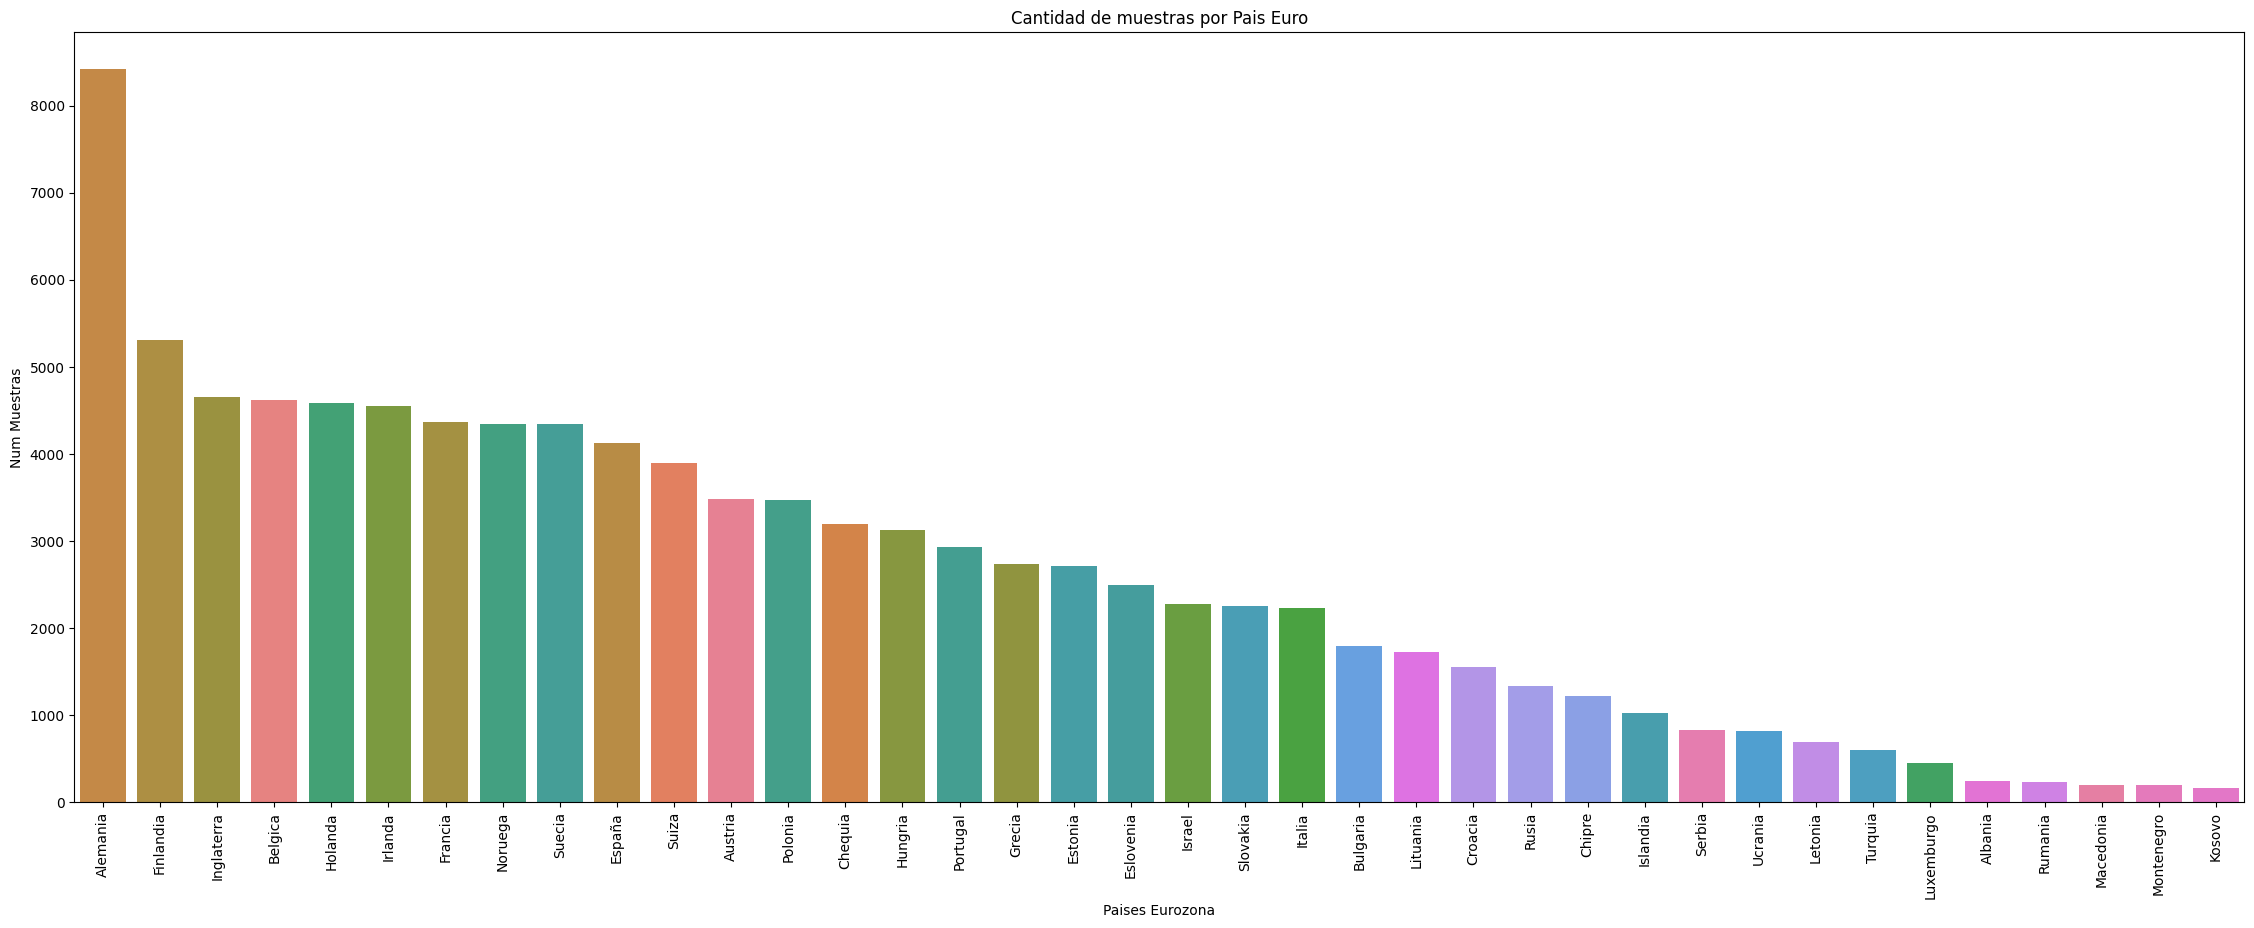

In [16]:
#2)Distribucion del dataset por paises. El dataset dfZES de 100k muestras.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(28, 10)) 
sns.countplot(
    data=dfZES,
    x='cntry',
    hue='cntry', 
    order=dfZES['cntry'].value_counts().index, 
    ax=ax  
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.ylabel('Num Muestras')
plt.xlabel('Paises Eurozona')
plt.title('Cantidad de muestras por Pais Euro')
plt.show()

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1087935981.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1087935981.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1087935981.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1087935981.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1087935981.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\J

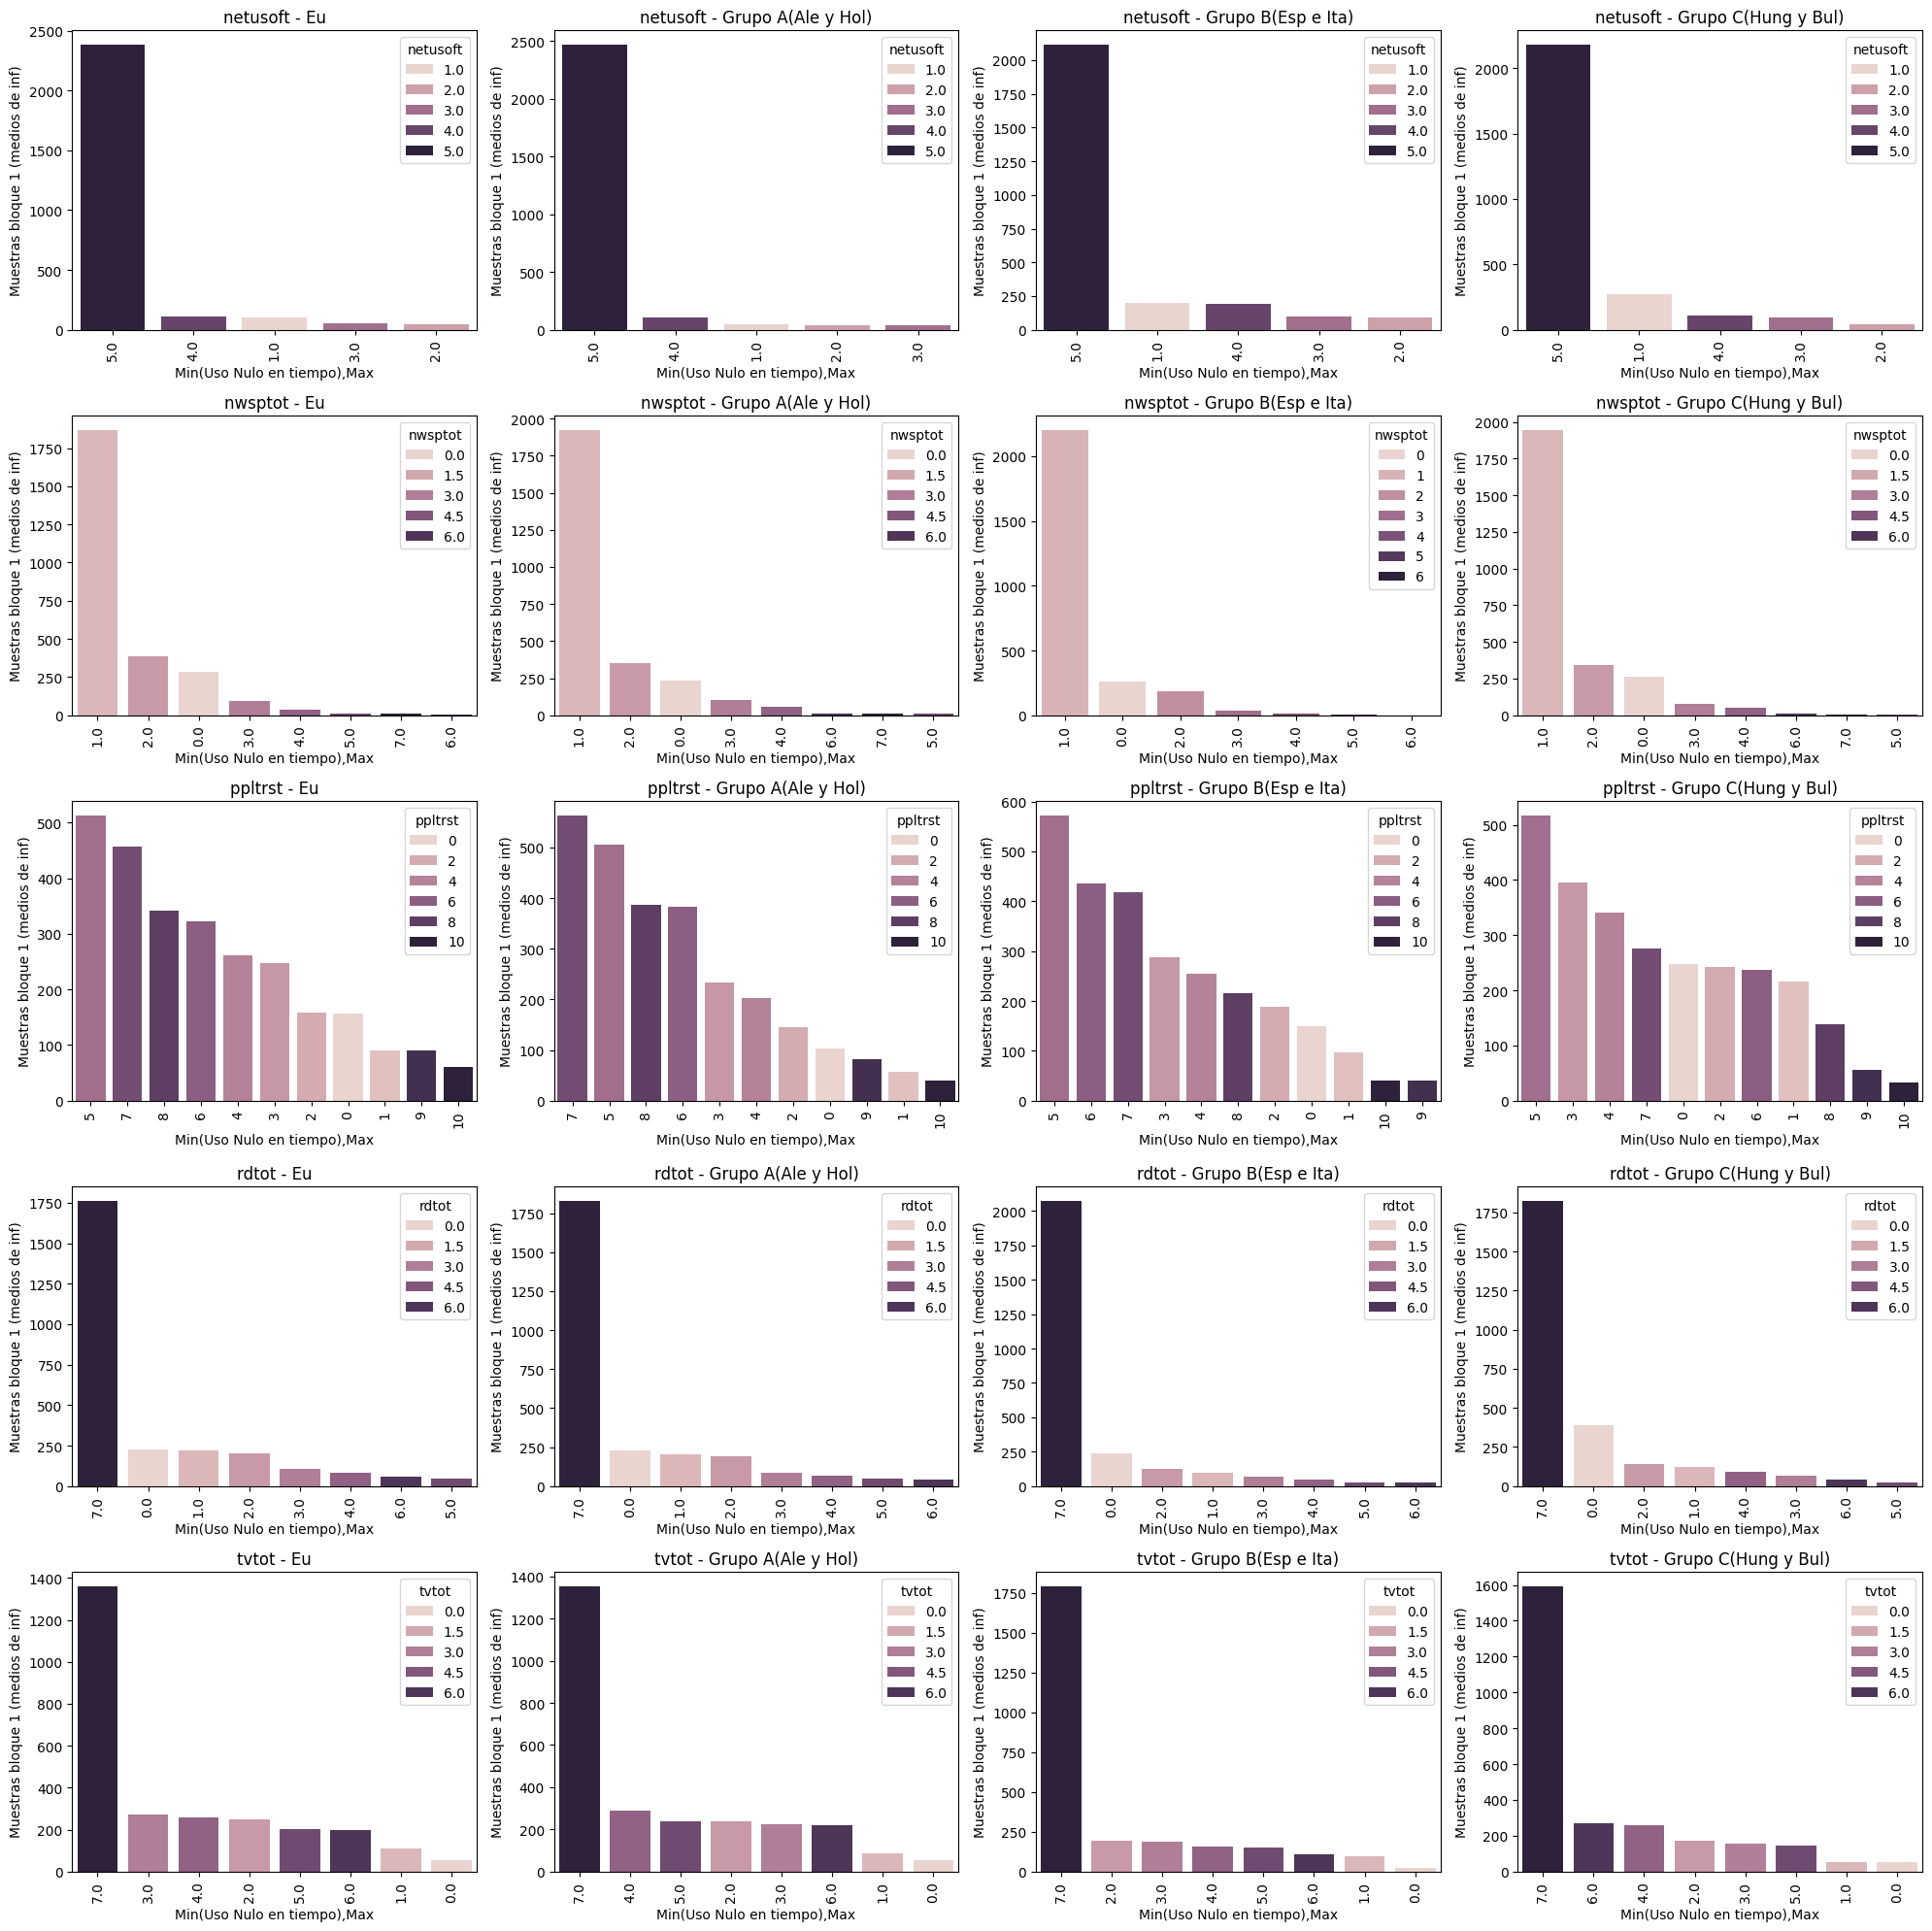

In [17]:
#2.1) Analisis univariable categoricas factorizadas.
#Univariable numericas
#Aplicamos una funcion para representar las distribuciones de las variables representadas en un grafico de barras.
#2.1.1)Bloque1 (Media Trust) - var target ['ppltrst'] (Grado de confianza en la opinion de la  gente y medios de comunicacion, 0 no confiar nada y 10 plena confianza)
import seaborn as sns
import matplotlib.pyplot as plt
def uninummultidf(df_list, columns, titles, figsize=(20, 20), rotation=90):
    num_dfs = len(df_list)
    num_cols = len(columns)
    num_rows = (num_dfs * num_cols - 1) // 4 + 1

    fig, axes = plt.subplots(num_rows, 4, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        for j, (df, title) in enumerate(zip(df_list, titles)):
            ax = axes[i * num_dfs + j]
            sns.countplot(
                data=df,
                x=col,
                hue=col,
                order=df[col].value_counts().index,
                ax=ax
            )
            ax.set_title(f'{col} - {title}')
            ax.set_ylabel('Muestras bloque 1 (medios de inf)')
            ax.set_xlabel('Min(Uso Nulo en tiempo),Max')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

    plt.tight_layout()
    plt.show()
df_list = [dfeu, dfA, dfB, dfC]
columns = ['netusoft','nwsptot','ppltrst','rdtot','tvtot']
titles = ['Eu', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hung y Bul)']
uninummultidf(df_list, columns, titles)
del df_list, columns, titles

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\3666637445.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\3666637445.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\3666637445.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\3666637445.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\3666637445.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\J

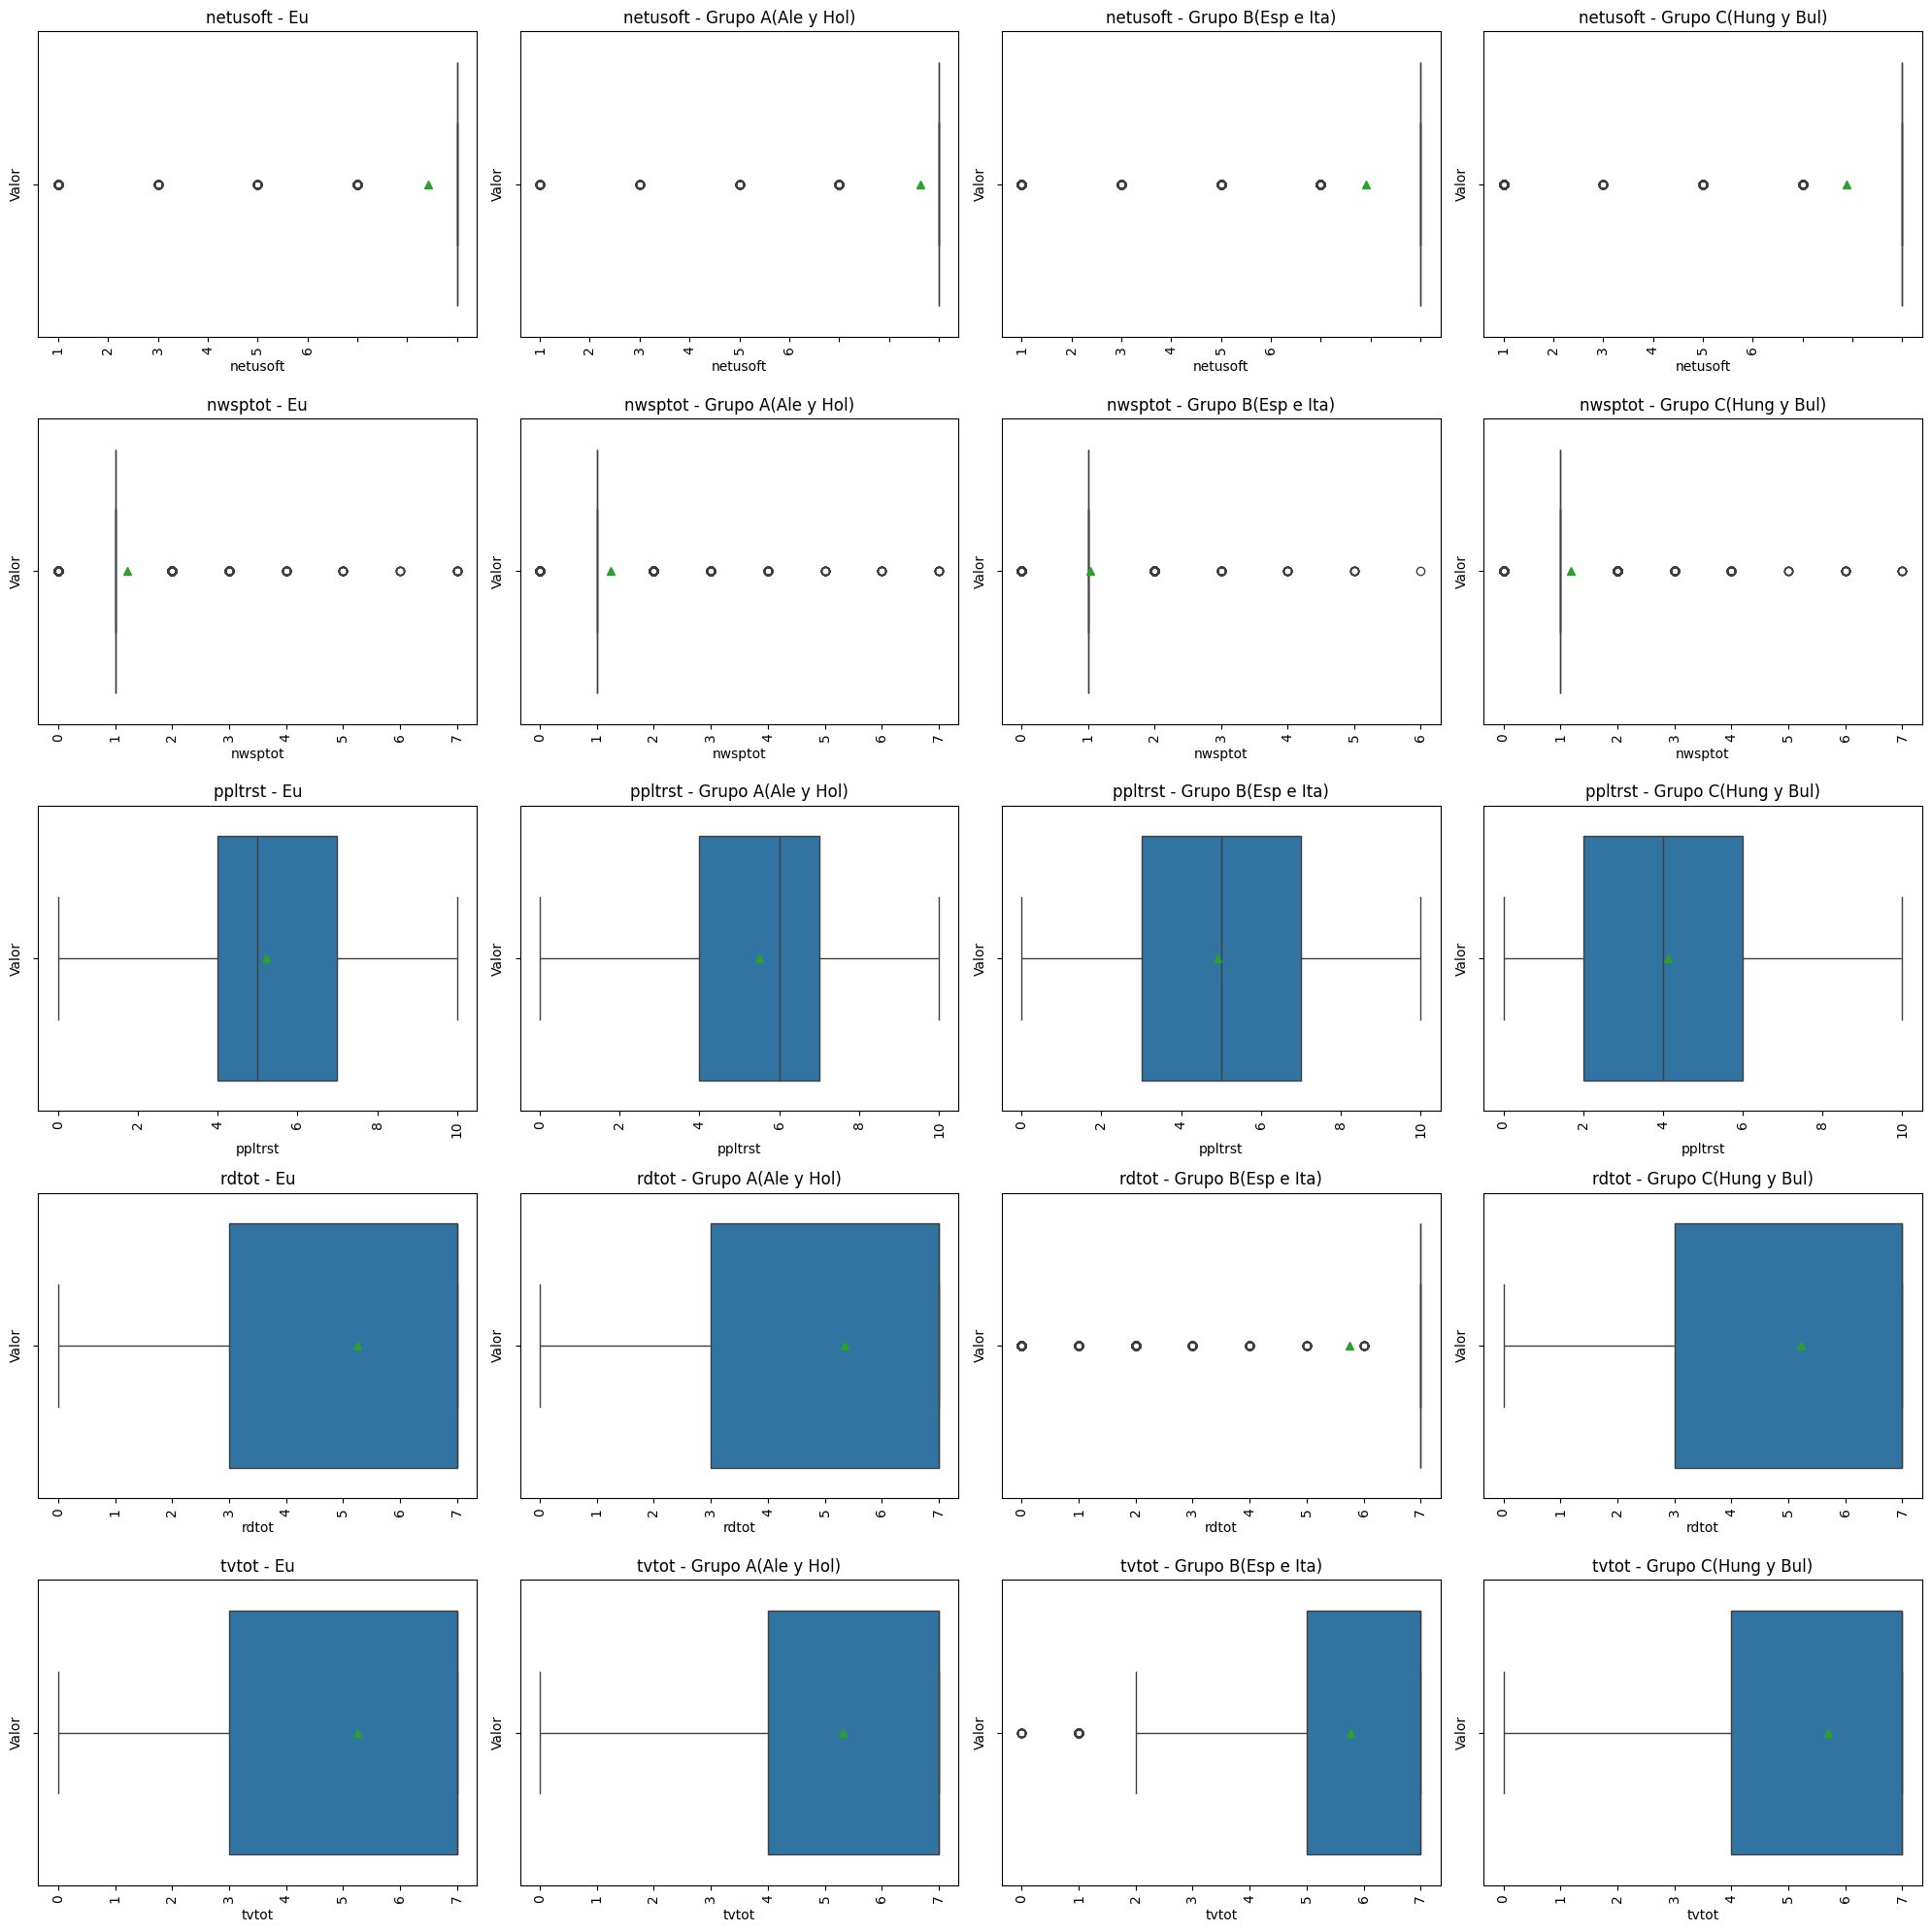

In [18]:

def uninummultidfbox(df_list, columns, titles, figsize=(20, 20), rotation=90):
  num_dfs = len(df_list)
  num_cols = len(columns)
  num_rows = (num_dfs * num_cols - 1) // 4 + 1

  fig, axes = plt.subplots(num_rows, 4, figsize=figsize)
  axes = axes.flatten()

  for i, col in enumerate(columns):
    for j, (df, title) in enumerate(zip(df_list, titles)):
      ax = axes[i * num_dfs + j]
      sns.boxplot(
          data=df,
          x=col,
          showmeans=True, 
          ax=ax
      )
      ax.set_title(f'{col} - {title}')
      ax.set_ylabel('Valor')
      ax.set_xlabel(col)
      ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

  plt.tight_layout()
  plt.show()


df_list = [dfeu, dfA, dfB, dfC]
columns = ['netusoft', 'nwsptot', 'ppltrst', 'rdtot', 'tvtot']
titles = ['Eu', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hung y Bul)']
uninummultidfbox(df_list, columns, titles)
del df_list, columns, titles

Conclusiones Bloque 1, Eu, Grupo A, B, C.:

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\4133435390.py:40: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\4133435390.py:40: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\4133435390.py:40: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\4133435390.py:40: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\4133435390.py:40: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\J

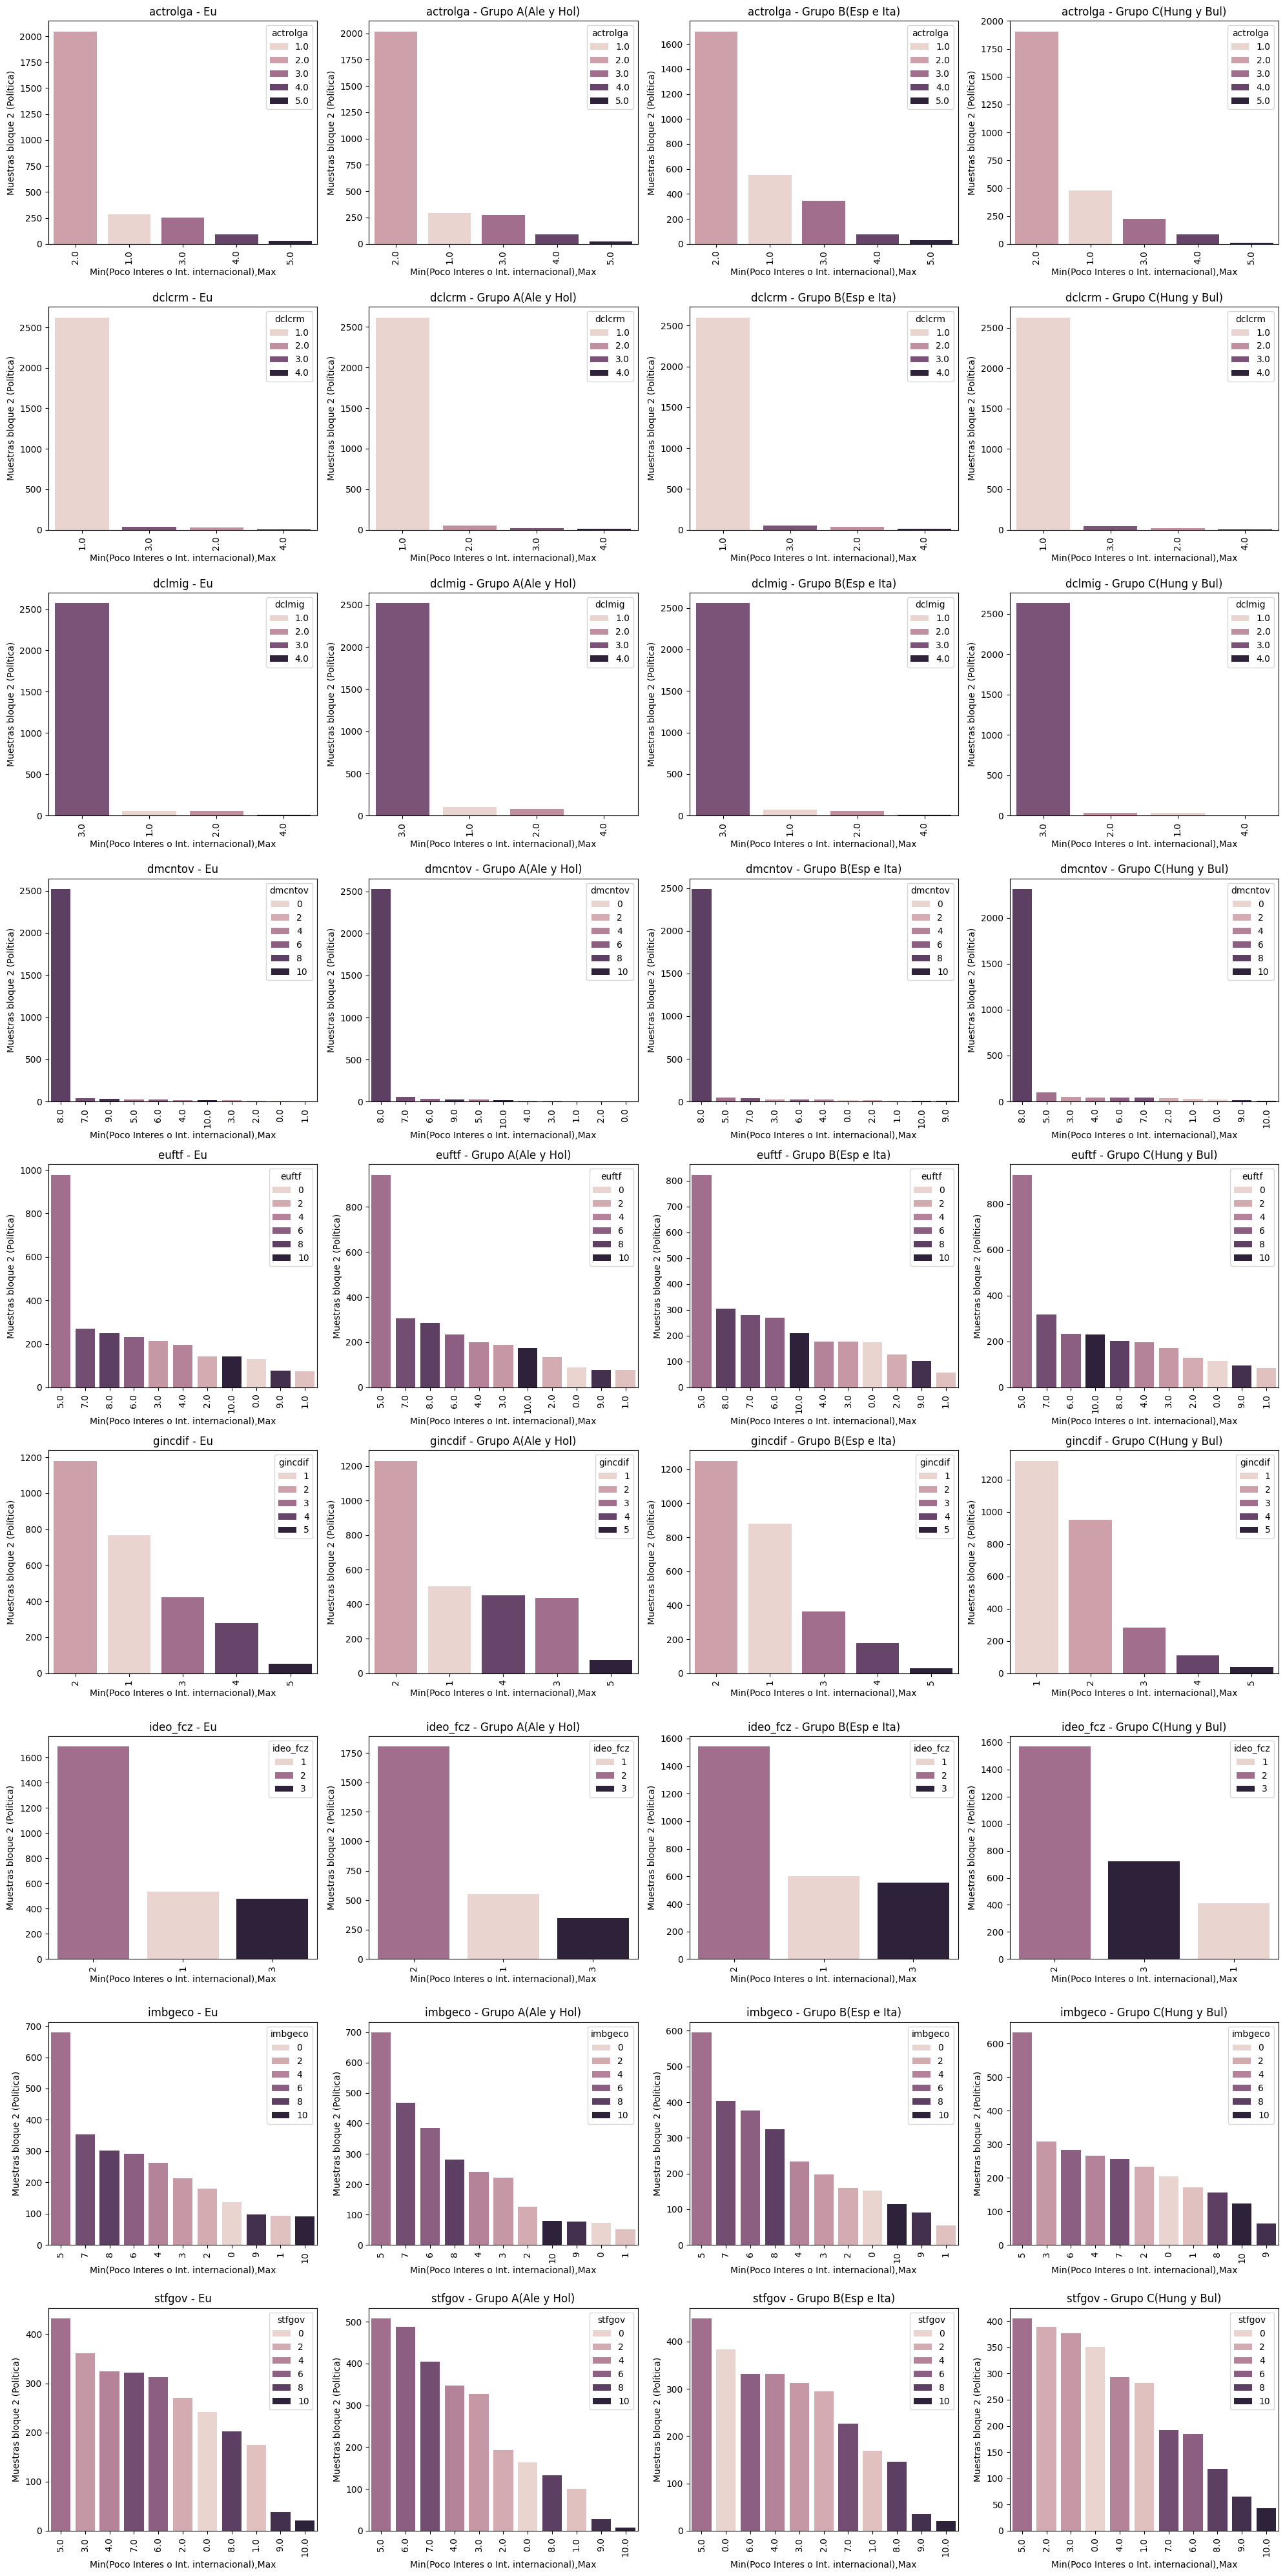

In [19]:
#2.1.2)Bloque2 (Politica) 
'''VAR  lrscale - Placement on left right scale target global(Cuan de izquierdas o derechas eres)

0	Left
1	1- 1,2,3 Izquierdas(Comunista)
2	2
3	3
4	4- 4,5,6,7 mediocentro(Socialdemocrata)
5	5-
6	6-
7	7-
8	8
9	9
10	Right- 8,9,10 Extrema derecha conservador
'''

import seaborn as sns
import matplotlib.pyplot as plt
def uninummultidf(df_list, columns, titles, figsize=(20, 40), rotation=90):
    num_dfs = len(df_list)
    num_cols = len(columns)
    num_rows = (num_dfs * num_cols - 1) // 4 + 1

    fig, axes = plt.subplots(num_rows, 4, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        for j, (df, title) in enumerate(zip(df_list, titles)):
            ax = axes[i * num_dfs + j]
            sns.countplot(
                data=df,
                x=col,
                hue=col,
                order=df[col].value_counts().index,
                ax=ax
            )
            ax.set_title(f'{col} - {title}')
            ax.set_ylabel('Muestras bloque 2 (Política)')
            ax.set_xlabel('Min(Poco Interes o Int. internacional),Max')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

    plt.tight_layout()
    plt.show()
df_list = [dfeu, dfA, dfB, dfC]
columns = ['actrolga','dclcrm','dclmig','dmcntov','euftf','gincdif','ideo_fcz','imbgeco','stfgov']
titles = ['Eu', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hung y Bul)']
uninummultidf(df_list, columns, titles)
del df_list, columns, titles

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\2496259468.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\2496259468.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\2496259468.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\2496259468.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\2496259468.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\J

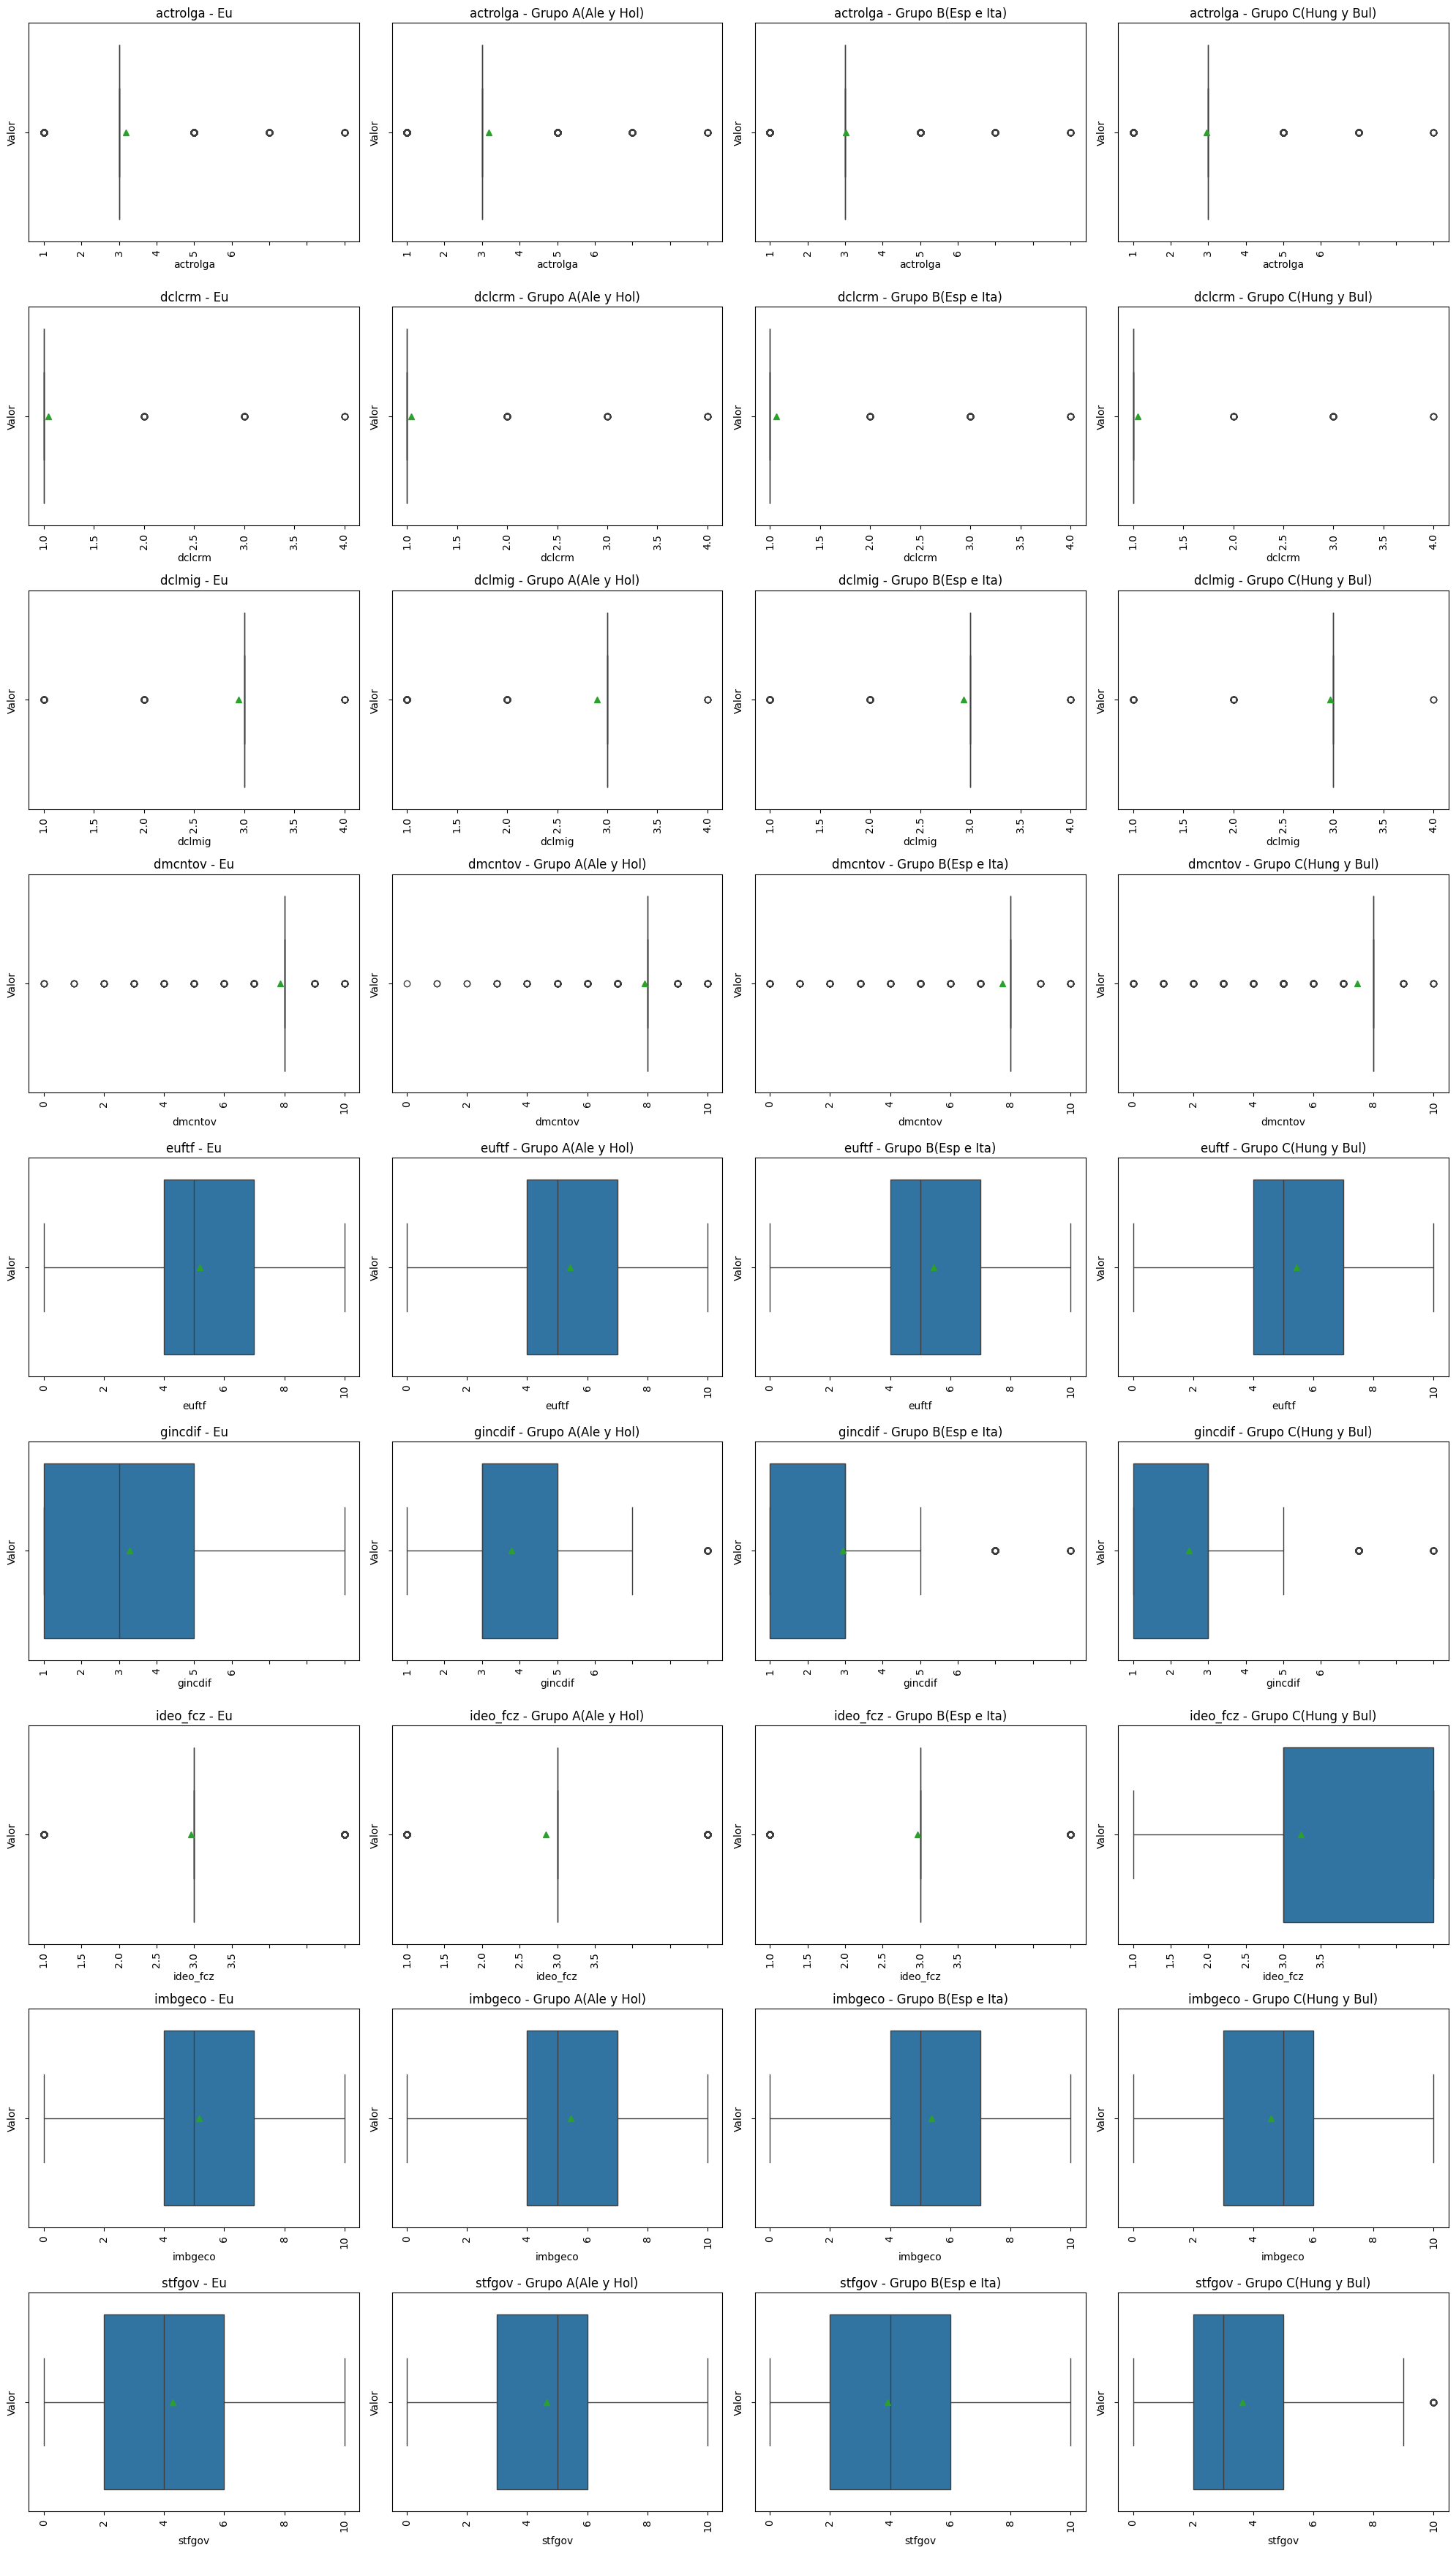

In [20]:

def uninummultidfbox(df_list, columns, titles, figsize=(20, 35), rotation=90):
  num_dfs = len(df_list)
  num_cols = len(columns)
  num_rows = (num_dfs * num_cols - 1) // 4 + 1

  fig, axes = plt.subplots(num_rows, 4, figsize=figsize)
  axes = axes.flatten()

  for i, col in enumerate(columns):
    for j, (df, title) in enumerate(zip(df_list, titles)):
      ax = axes[i * num_dfs + j]
      sns.boxplot(
          data=df,
          x=col,
          showmeans=True, 
          ax=ax
      )
      ax.set_title(f'{col} - {title}')
      ax.set_ylabel('Valor')
      ax.set_xlabel(col)
      ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

  plt.tight_layout()
  plt.show()

df_list = [dfeu, dfA, dfB, dfC]
columns = ['actrolga','dclcrm','dclmig','dmcntov','euftf','gincdif','ideo_fcz','imbgeco','stfgov']
titles = ['Eu', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hung y Bul)']
uninummultidfbox(df_list, columns, titles)
del df_list, columns, titles

Conclusiones Bloque 2, Eu, Grupo A, B, C.:

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1917508258.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1917508258.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1917508258.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1917508258.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\1917508258.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\J

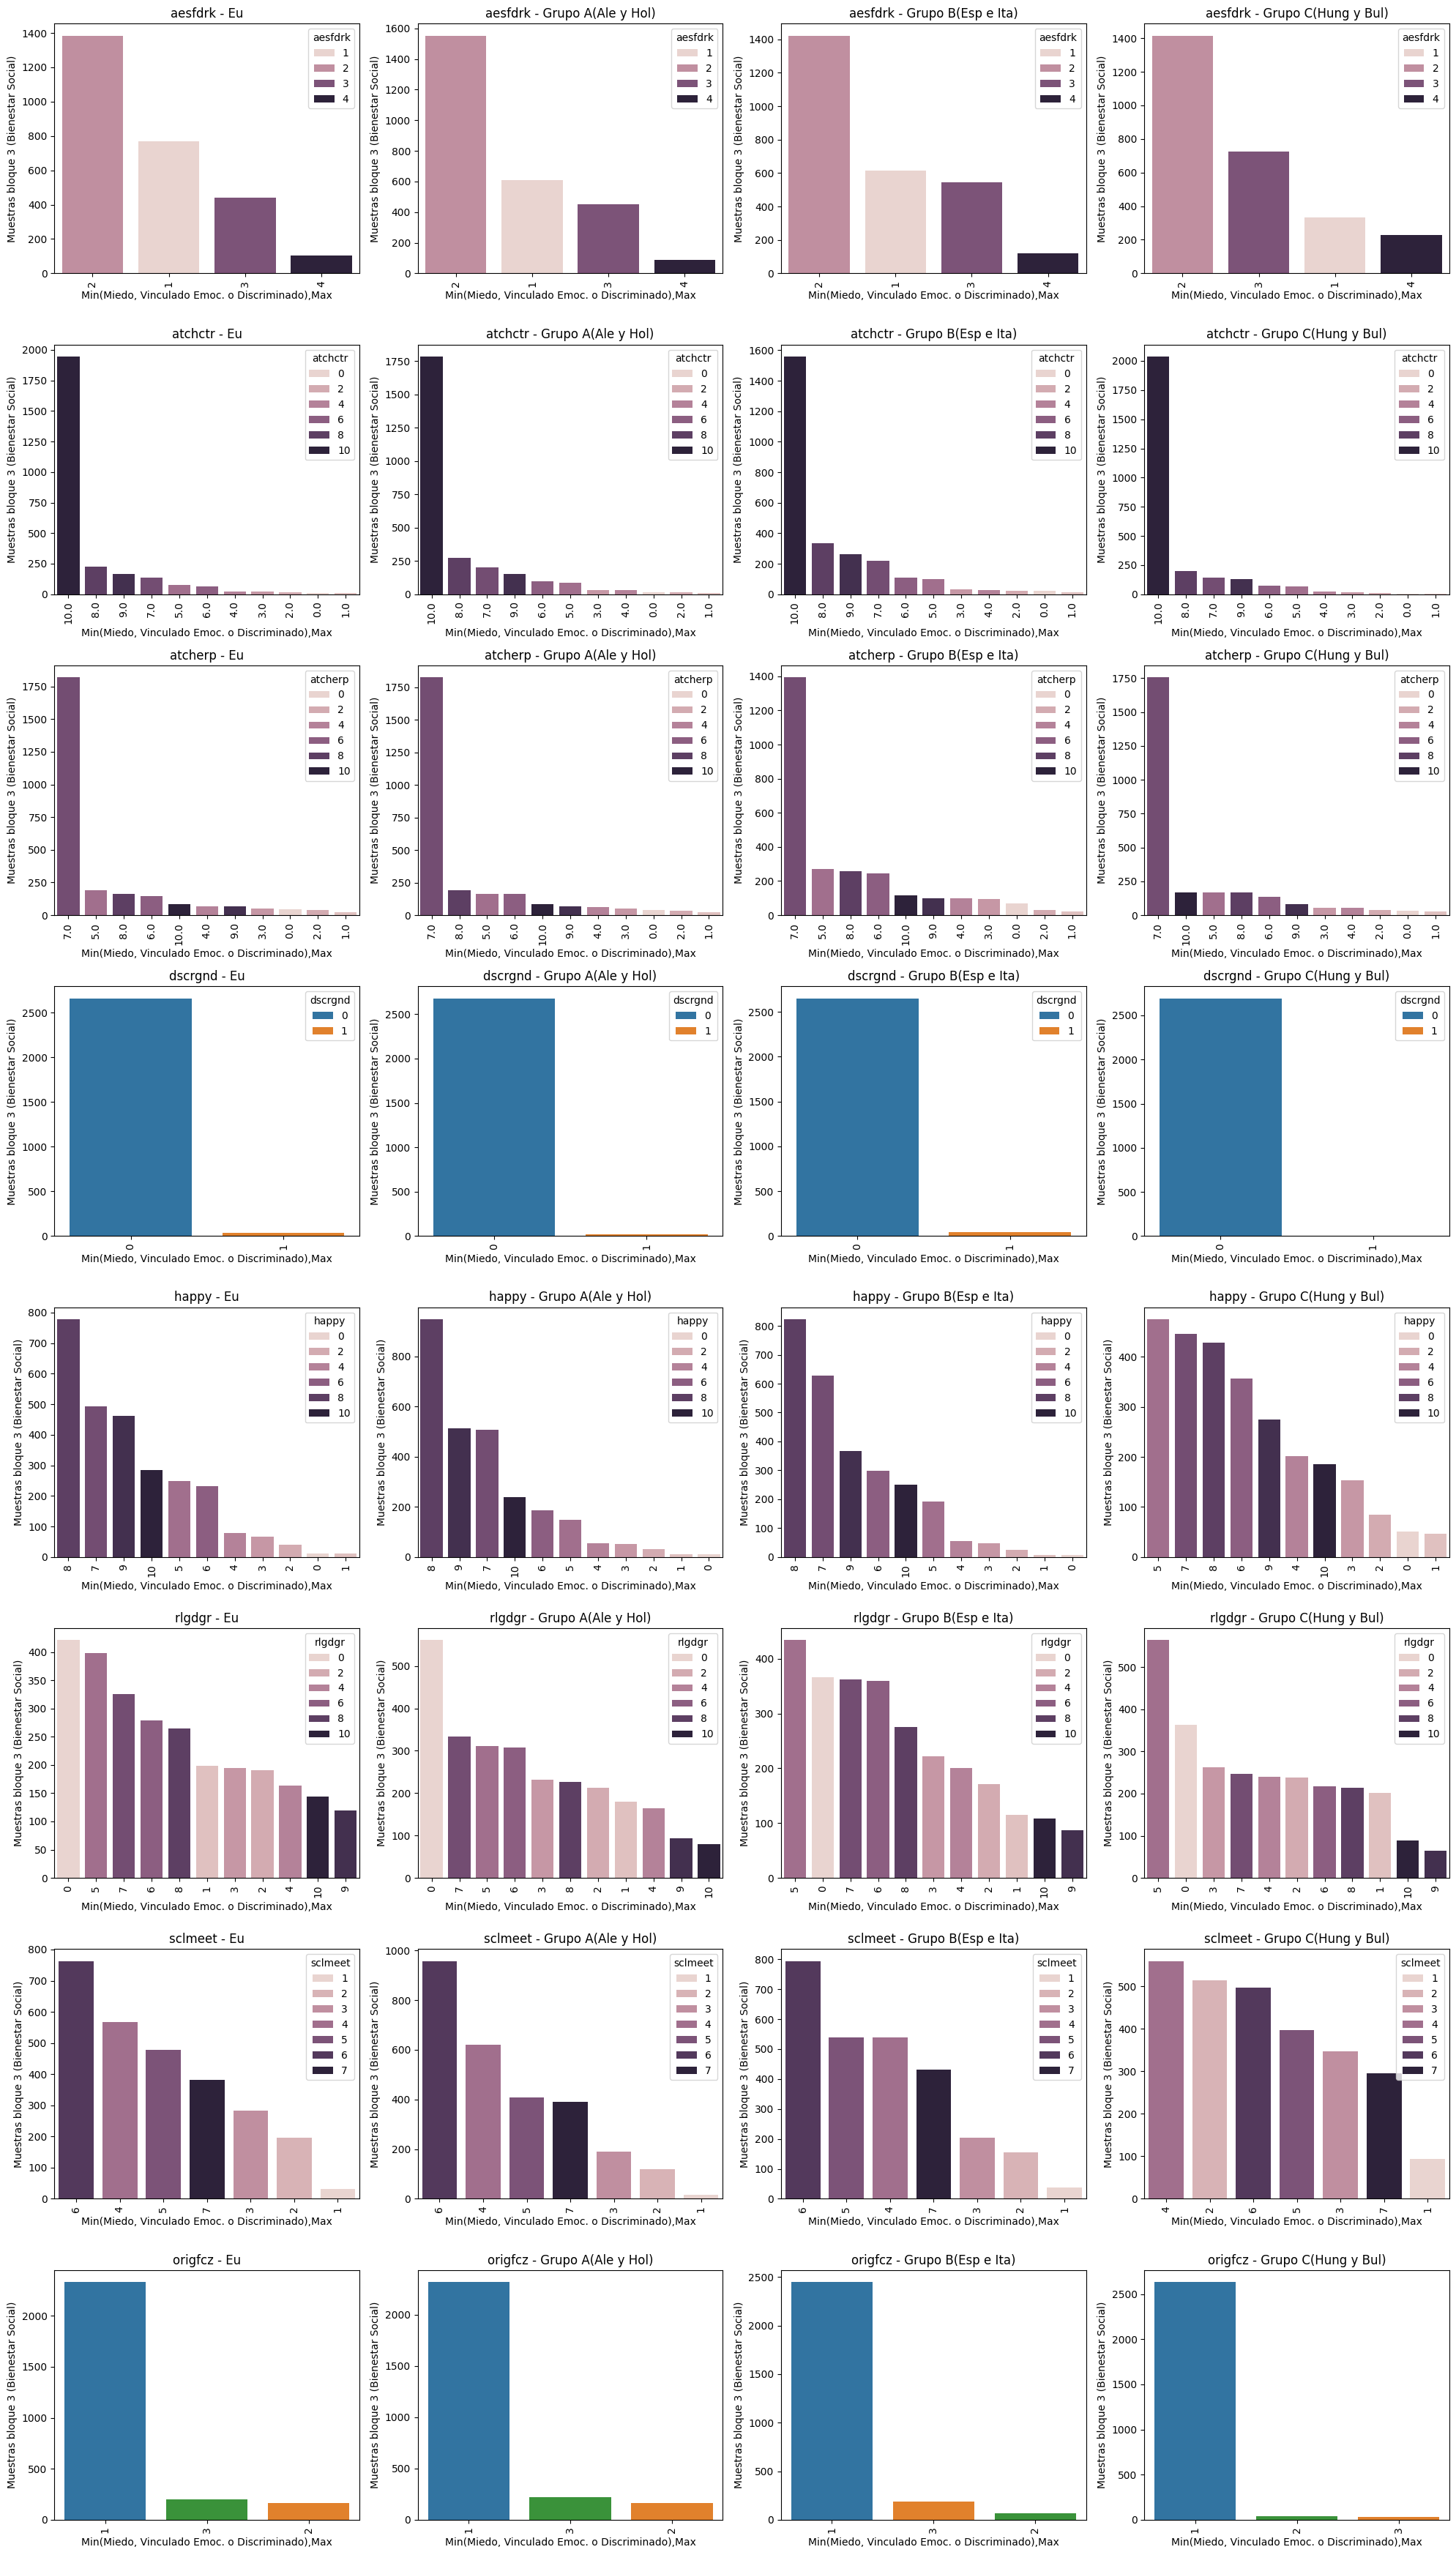

In [21]:
#2.1.3)Bloque 3 (Bienestar Social) - var target ['sclmeet'] - How often socially meet with friends, relatives or colleagues (Cuan antisocial el individuo se ha hecho como resultado, 0 antisocial, 7 Necesitado de Socializar)
#                                  
import seaborn as sns
import matplotlib.pyplot as plt
def uninummultidf(df_list, columns, titles, figsize=(20, 35), rotation=90):
    num_dfs = len(df_list)
    num_cols = len(columns)
    num_rows = (num_dfs * num_cols - 1) // 4 + 1

    fig, axes = plt.subplots(num_rows, 4, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        for j, (df, title) in enumerate(zip(df_list, titles)):
            ax = axes[i * num_dfs + j]
            sns.countplot(
                data=df,
                x=col,
                hue=col,
                order=df[col].value_counts().index,
                ax=ax
            )
            ax.set_title(f'{col} - {title}')
            ax.set_ylabel('Muestras bloque 3 (Bienestar Social)')
            ax.set_xlabel('Min(Miedo, Vinculado Emoc. o Discriminado),Max')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

    plt.tight_layout()
    plt.show()
df_list = [dfeu, dfA, dfB, dfC]
columns = ['aesfdrk','atchctr','atcherp','dscrgnd','happy','rlgdgr','sclmeet','origfcz']
titles = ['Eu', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hung y Bul)']
uninummultidf(df_list, columns, titles)
del df_list, columns, titles

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\2475995213.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\2475995213.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\2475995213.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\2475995213.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\2475995213.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\J

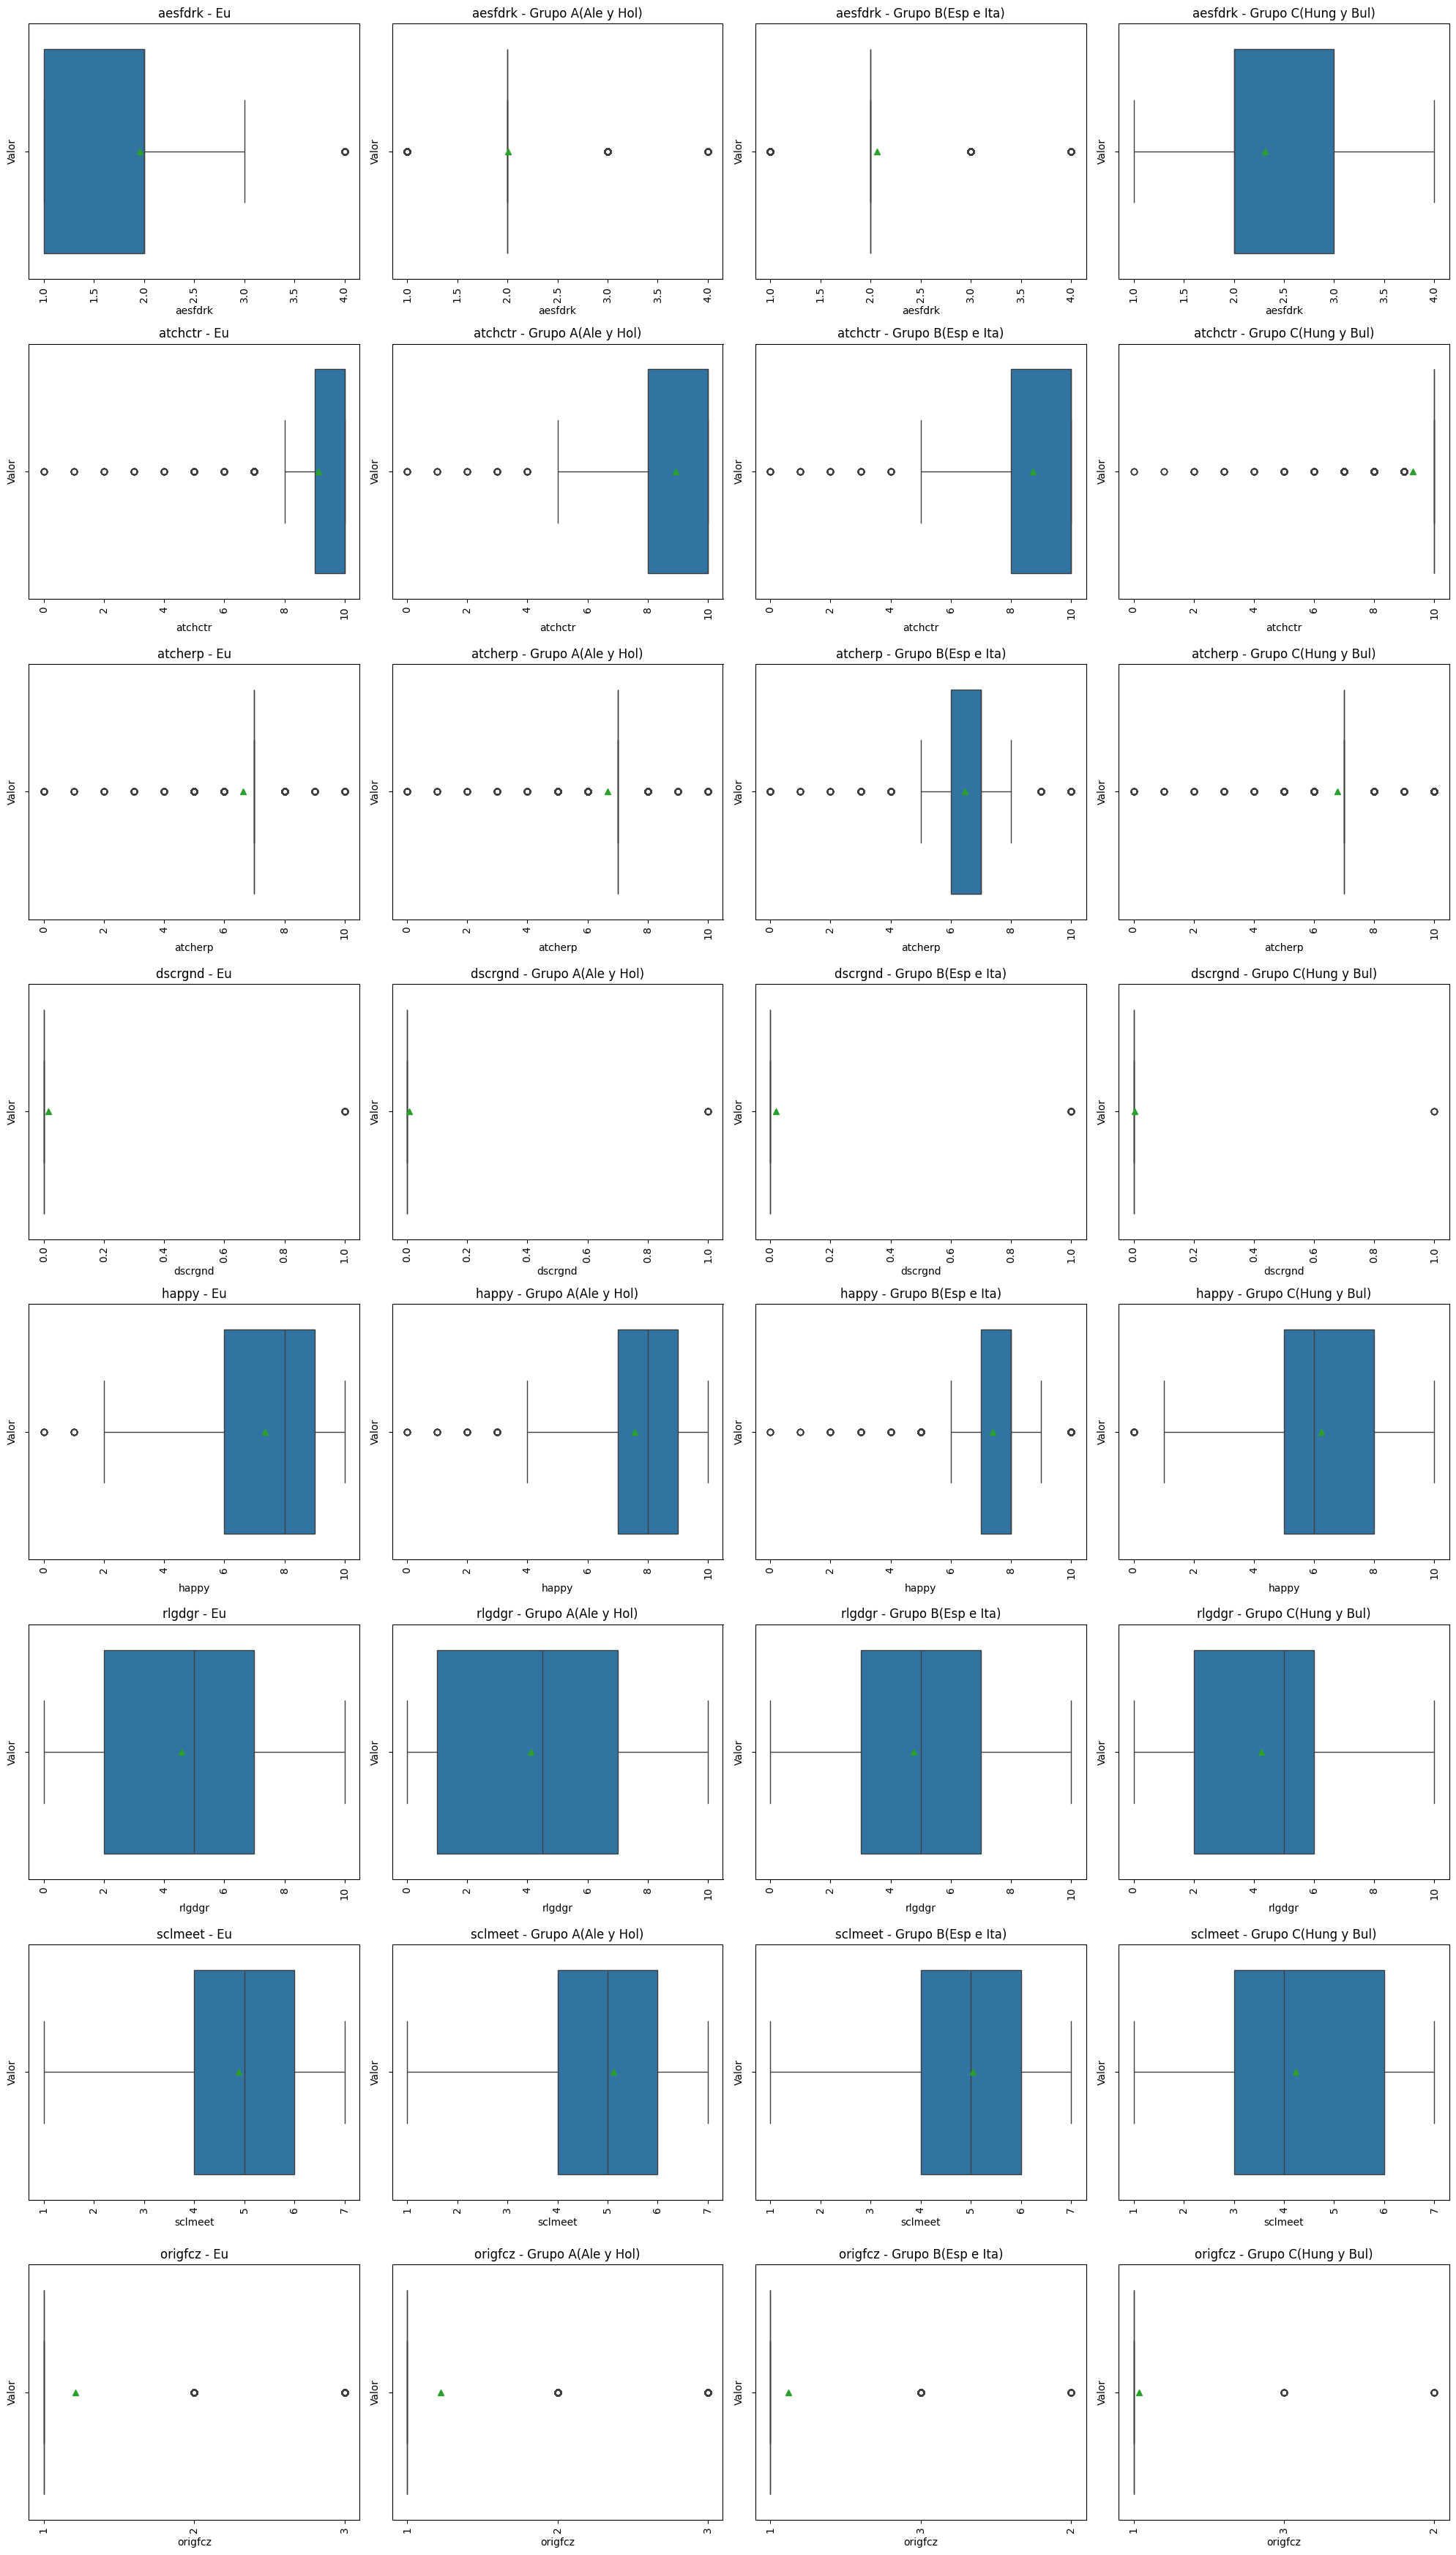

In [22]:
def uninummultidfbox(df_list, columns, titles, figsize=(20, 35), rotation=90):
  num_dfs = len(df_list)
  num_cols = len(columns)
  num_rows = (num_dfs * num_cols - 1) // 4 + 1

  fig, axes = plt.subplots(num_rows, 4, figsize=figsize)
  axes = axes.flatten()

  for i, col in enumerate(columns):
    for j, (df, title) in enumerate(zip(df_list, titles)):
      ax = axes[i * num_dfs + j]
      sns.boxplot(
          data=df,
          x=col,
          showmeans=True, 
          ax=ax
      )
      ax.set_title(f'{col} - {title}')
      ax.set_ylabel('Valor')
      ax.set_xlabel(col)
      ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

  plt.tight_layout()
  plt.show()

df_list = [dfeu, dfA, dfB, dfC]
columns = ['aesfdrk','atchctr','atcherp','dscrgnd','happy','rlgdgr','sclmeet','origfcz']
titles = ['Eu', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hung y Bul)']
uninummultidfbox(df_list, columns, titles)
del df_list, columns, titles

Conclusiones Bloque 3 Eu, Grupo A, B y C:

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\319922156.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\319922156.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\319922156.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\319922156.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\319922156.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\

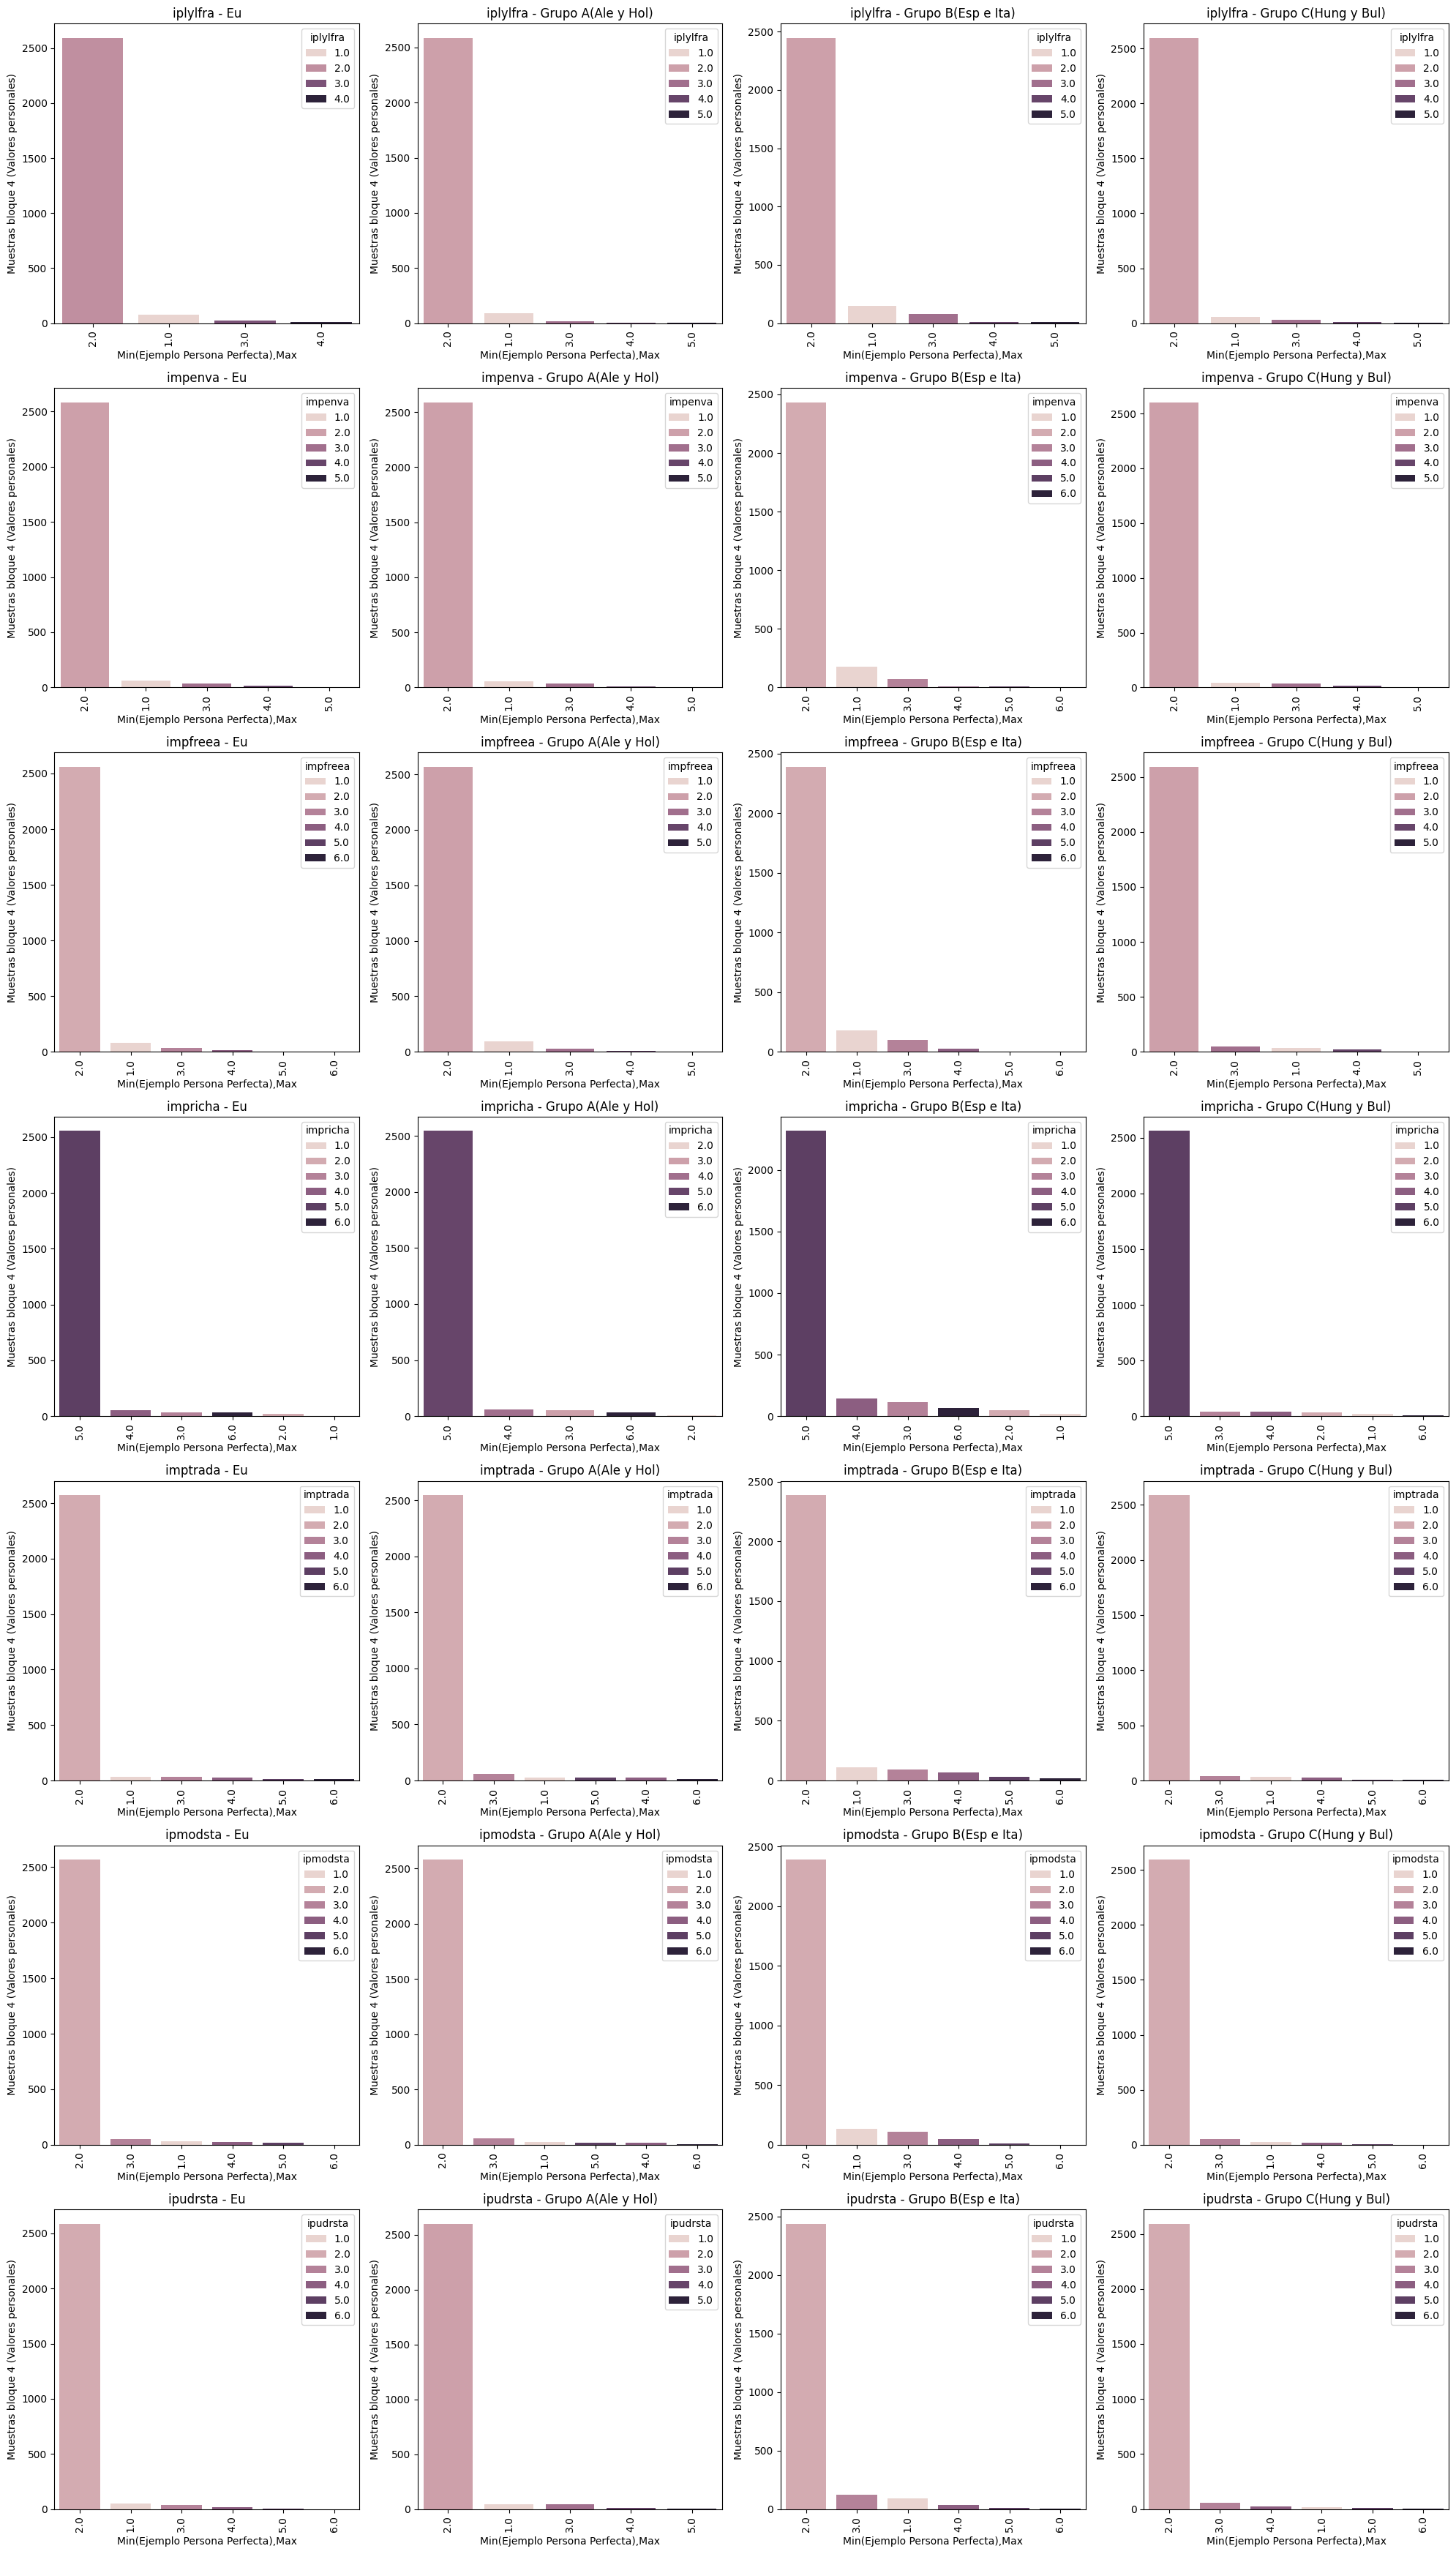

In [23]:
#2.1.4)Bloque 4 (Valores personales) - var target ['iplylfra'] - Important to be loyal to friends and devote to people close 
#                                      (Como de leal eres con los que consideras amigos y con tu familia, 1 Individuo perfecto en este aspecto, 6 individuo interesado y sin palabra)
import seaborn as sns
import matplotlib.pyplot as plt
def uninummultidf(df_list, columns, titles, figsize=(20, 35), rotation=90):
    num_dfs = len(df_list)
    num_cols = len(columns)
    num_rows = (num_dfs * num_cols - 1) // 4 + 1

    fig, axes = plt.subplots(num_rows, 4, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        for j, (df, title) in enumerate(zip(df_list, titles)):
            ax = axes[i * num_dfs + j]
            sns.countplot(
                data=df,
                x=col,
                hue=col,
                order=df[col].value_counts().index,
                ax=ax
            )
            ax.set_title(f'{col} - {title}')
            ax.set_ylabel('Muestras bloque 4 (Valores personales)')
            ax.set_xlabel('Min(Ejemplo Persona Perfecta),Max')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

    plt.tight_layout()
    plt.show()
df_list = [dfeu, dfA, dfB, dfC]
columns = ['iplylfra','impenva','impfreea','impricha','imptrada','ipmodsta','ipudrsta']      
titles = ['Eu', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hung y Bul)']
uninummultidf(df_list, columns, titles)
del df_list, columns, titles

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\486897054.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\486897054.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\486897054.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\486897054.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\486897054.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Josue\

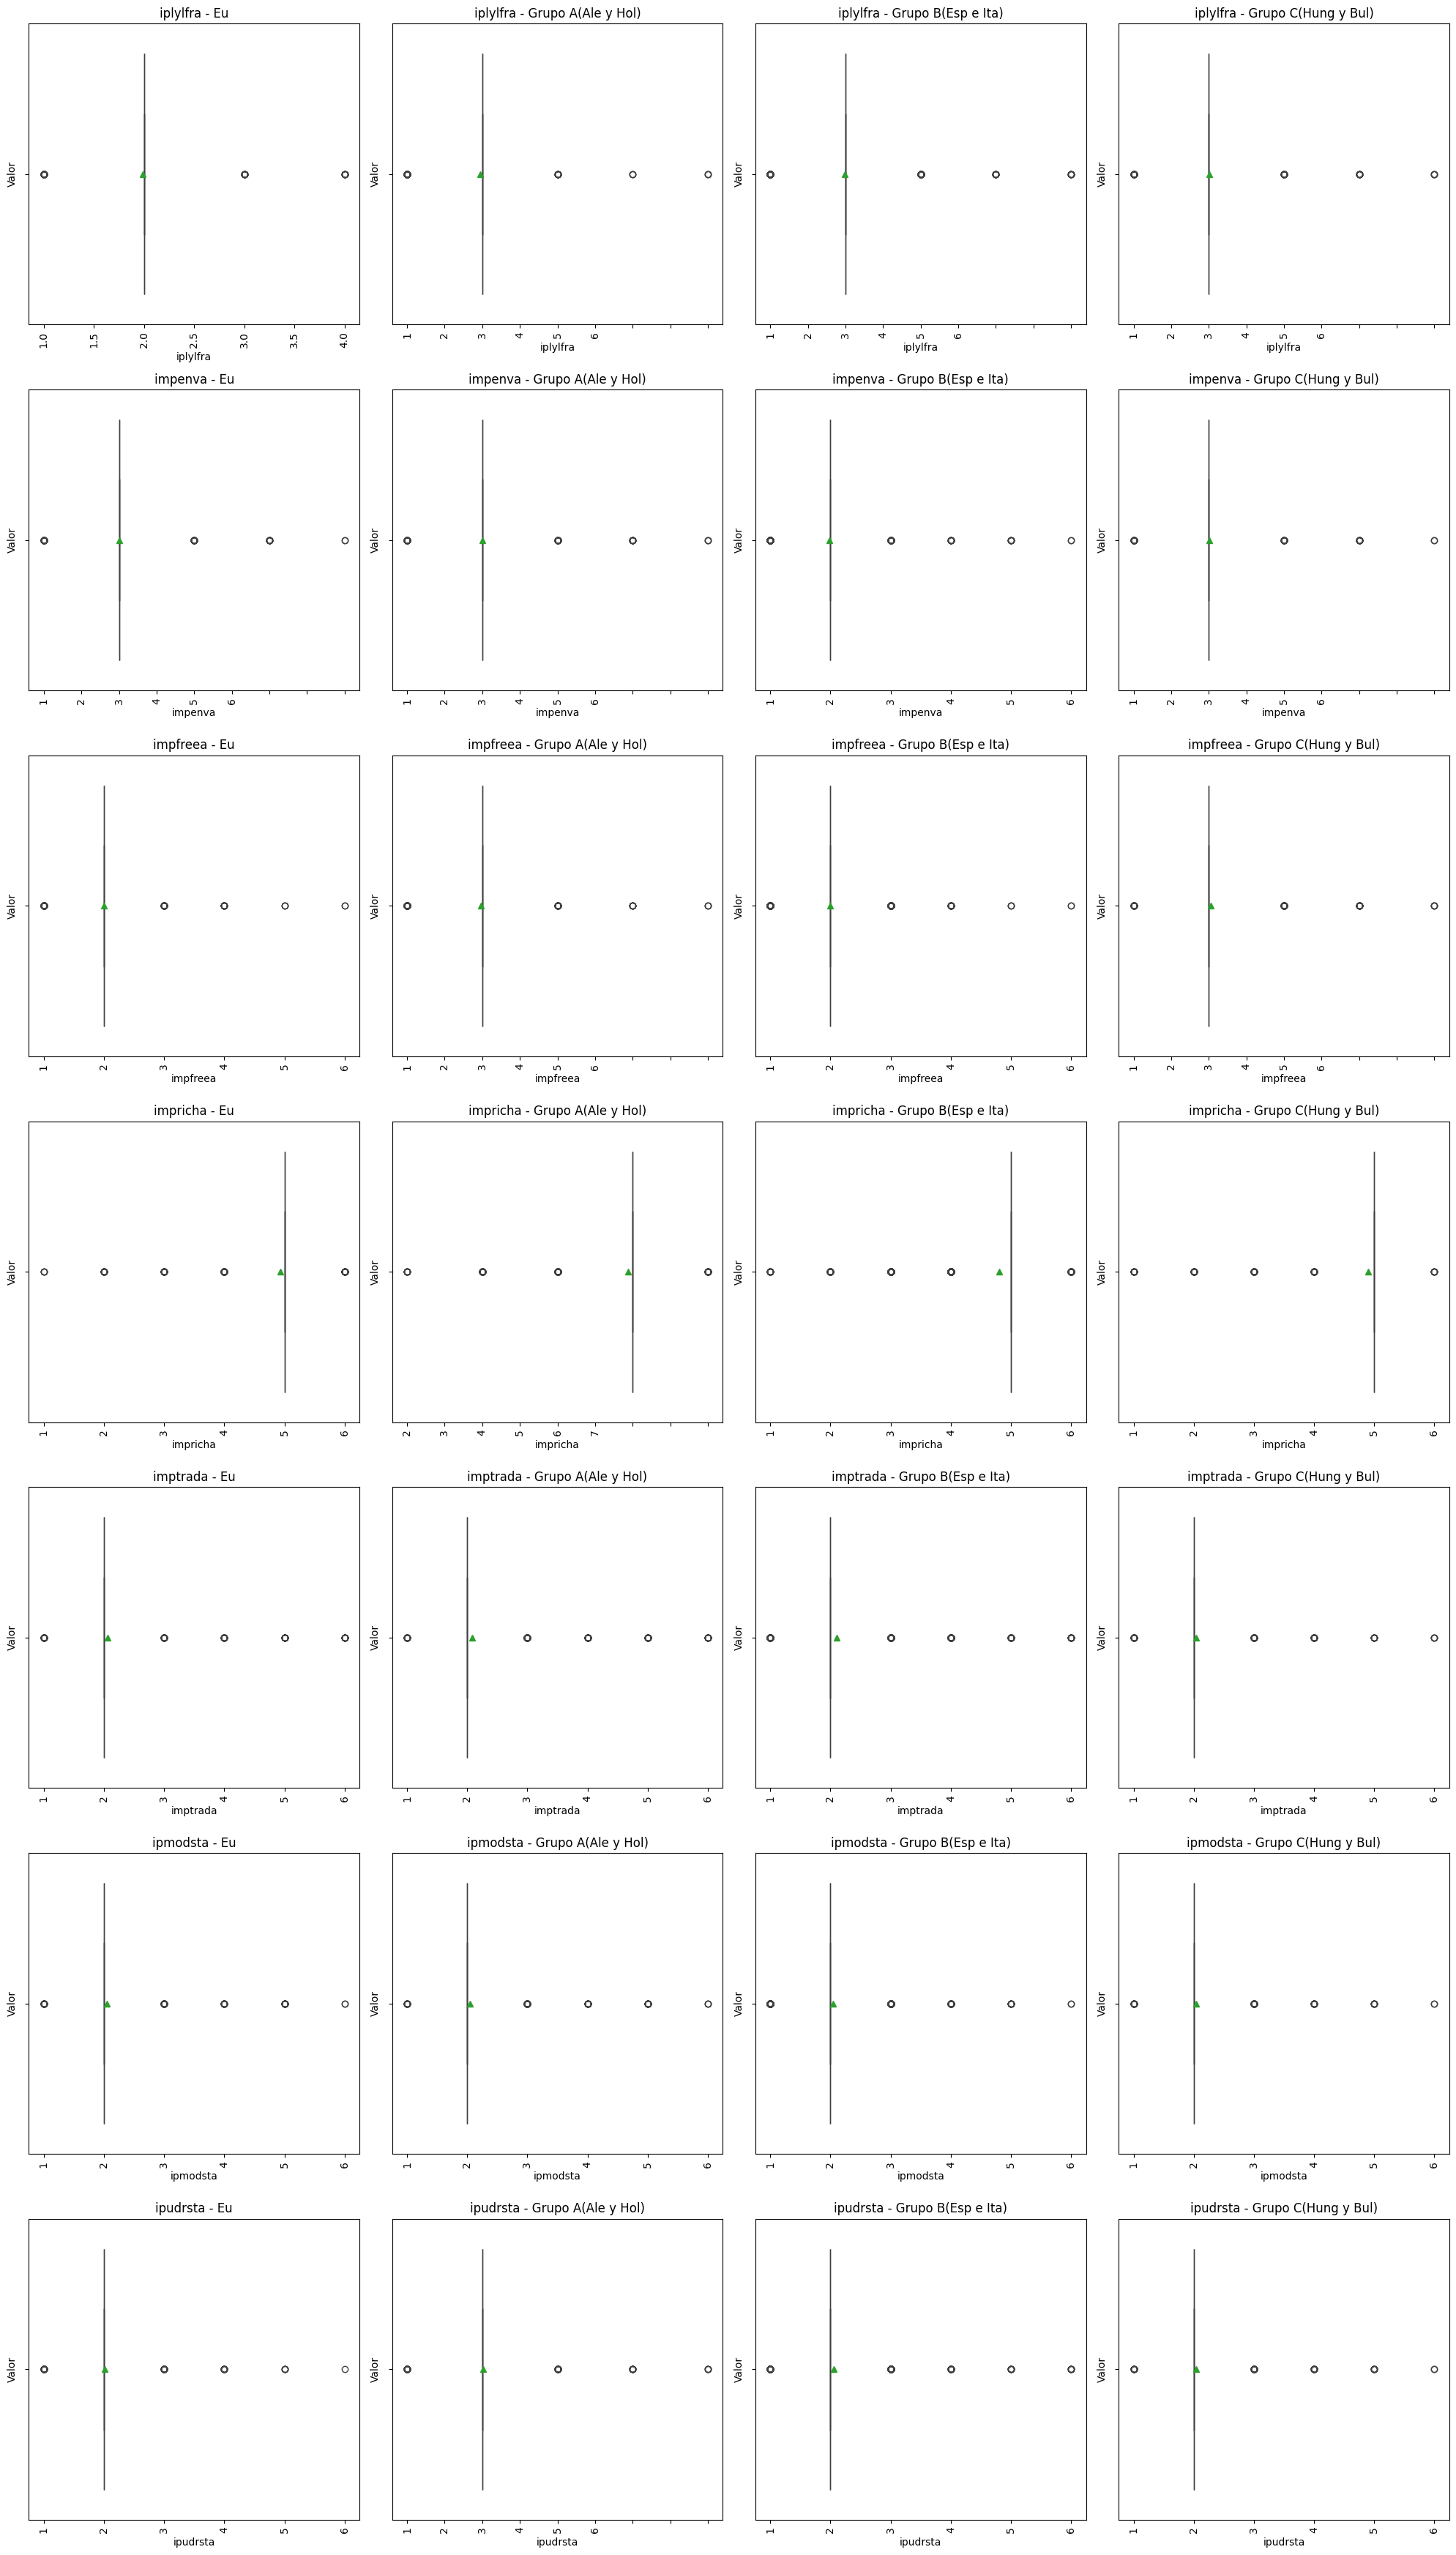

In [24]:
def uninummultidfbox(df_list, columns, titles, figsize=(20, 35), rotation=90):
  num_dfs = len(df_list)
  num_cols = len(columns)
  num_rows = (num_dfs * num_cols - 1) // 4 + 1

  fig, axes = plt.subplots(num_rows, 4, figsize=figsize)
  axes = axes.flatten()

  for i, col in enumerate(columns):
    for j, (df, title) in enumerate(zip(df_list, titles)):
      ax = axes[i * num_dfs + j]
      sns.boxplot(
          data=df,
          x=col,
          showmeans=True, 
          ax=ax
      )
      ax.set_title(f'{col} - {title}')
      ax.set_ylabel('Valor')
      ax.set_xlabel(col)
      ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

  plt.tight_layout()
  plt.show()

df_list = [dfeu, dfA, dfB, dfC]
columns = ['iplylfra','impenva','impfreea','impricha','imptrada','ipmodsta','ipudrsta'] 
titles = ['Eu', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hung y Bul)']
uninummultidfbox(df_list, columns, titles)
del df_list, columns, titles

Conclusiones Bloque 4, Eu, Grupo A, B y C:

2.2) ANÁLISIS MULTIVARIABLE, PARA EL EDA SOLO TRABAJAREMOS CON LA VARIABLE TARGET GLOBAL ['origfcz'] (1-Nacional, 2-Mixto(Nacional pero con almenos un padre extranjero), 3-Extranjero)


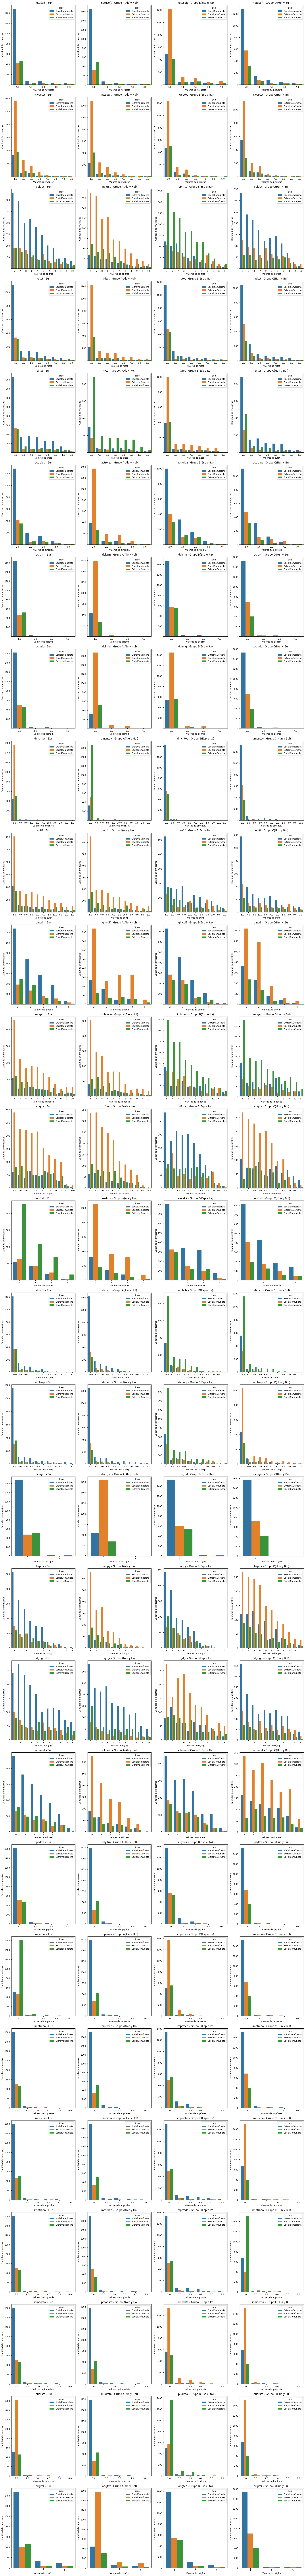

In [25]:
#2.2) MultiVariable Numerica - var target global ['ideo'] o ['ideo_fcz']
#Vamos a visualizar como influye nuestra variable target en la cantidad de muestras y el valor de las muestras. En un diagrama de barras apilado.
import seaborn as sns
import matplotlib.pyplot as plt

def multivarnum(df_list, target_col, numeric_cols, titles, figsize=(20, 6), hue_order=None):
    num_dfs = len(df_list)
    num_cols = len(numeric_cols)
    num_rows = (num_dfs * num_cols - 1) // 4 + 1
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        for j, (df, title) in enumerate(zip(df_list, titles)):
            ax = axes[i * num_dfs + j]
            sns.countplot(
                data=df,
                x=col,
                hue=target_col,
                order=df[col].value_counts().index,
                ax=ax,
            
            )
            ax.set_title(f'{col} - {title}')
            ax.set_ylabel('Cantidad de muestras')
            ax.set_xlabel('Valores de {}'.format(col))

    plt.tight_layout()
    plt.show()

df_list = [dfeu, dfA, dfB, dfC]
target_col = 'ideo'
numeric_cols = ['netusoft','nwsptot','ppltrst','rdtot','tvtot','actrolga','dclcrm','dclmig','dmcntov','euftf','gincdif','imbgeco','stfgov','aesfdrk','atchctr','atcherp','dscrgnd','happy','rlgdgr','sclmeet','iplylfra','impenva','impfreea','impricha','imptrada','ipmodsta','ipudrsta', 'origfcz']

titles = ['Eur', 'Grupo A(Ale y Hol)', 'Grupo B(Esp e Ita)', 'Grupo C(Hun y Bul)']
multivarnum(df_list, target_col, numeric_cols, titles)
del df_list, target_col, numeric_cols, titles

#2.2) MultiVariable Numerica - var target ['ideo_fcz']
#Vamos a visualizar como influye nuestra variable target al desplazamiento de las distribuciones cuartilicas de cada una de las variables observadas, 
#Por razones ideologicas(izquierda-centro-derecha).(La cantidad de muestras se representara en escala termica)
def multivarnumbox(df, target_col, numeric_cols, title, figsize=(10, 6)):
  num_cols = len(numeric_cols)
  fig, axes = plt.subplots(1, num_cols, figsize=figsize)

  for i, col in enumerate(numeric_cols):
      ax = axes[i]
      sns.boxplot(
          x=target_col,
          y=col,
          showmeans=True,
          data=df,
          palette='RdBu'
      )
      ax.set_title(col)
      ax.set_xlabel(target_col)
      ax.set_ylabel(col)

  fig.suptitle(title)
  plt.tight_layout()
  plt.show()


df = dfeu  
target_col = 'ideo'
numeric_cols = ['netusoft', 'nwsptot', 'ppltrst', 'rdtot', 'tvtot']
title = 'Distribuciones Eu variables respecto [orig]'
multivarnumbox(df, target_col, numeric_cols, title)
Necesito depurar la función, no me itera correctamente, solo grafica el ultimo subplot.

In [26]:
#No es un conjunto de graficos facil de interpetar y sea muy visual. Solo lo aplicare para el dataframe de Europa 'dfeu'. Se debera ampliar en una pagina a parte.
#sns.pairplot(dfeu)

In [27]:
print(dfeu.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, 27720 to 70861
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   netusoft  2700 non-null   float64
 1   nwsptot   2700 non-null   float64
 2   ppltrst   2700 non-null   int64  
 3   rdtot     2700 non-null   float64
 4   tvtot     2700 non-null   float64
 5   actrolga  2700 non-null   float64
 6   dclcrm    2700 non-null   float64
 7   dclmig    2700 non-null   float64
 8   dmcntov   2700 non-null   float64
 9   euftf     2700 non-null   float64
 10  gincdif   2700 non-null   int64  
 11  ideo_fcz  2700 non-null   int64  
 12  ideo      2700 non-null   object 
 13  imbgeco   2700 non-null   int64  
 14  stfgov    2700 non-null   float64
 15  aesfdrk   2700 non-null   int64  
 16  atchctr   2700 non-null   float64
 17  atcherp   2700 non-null   float64
 18  dscrgnd   2700 non-null   int64  
 19  happy     2700 non-null   int64  
 20  rlgdgr    2700 non-null   int6

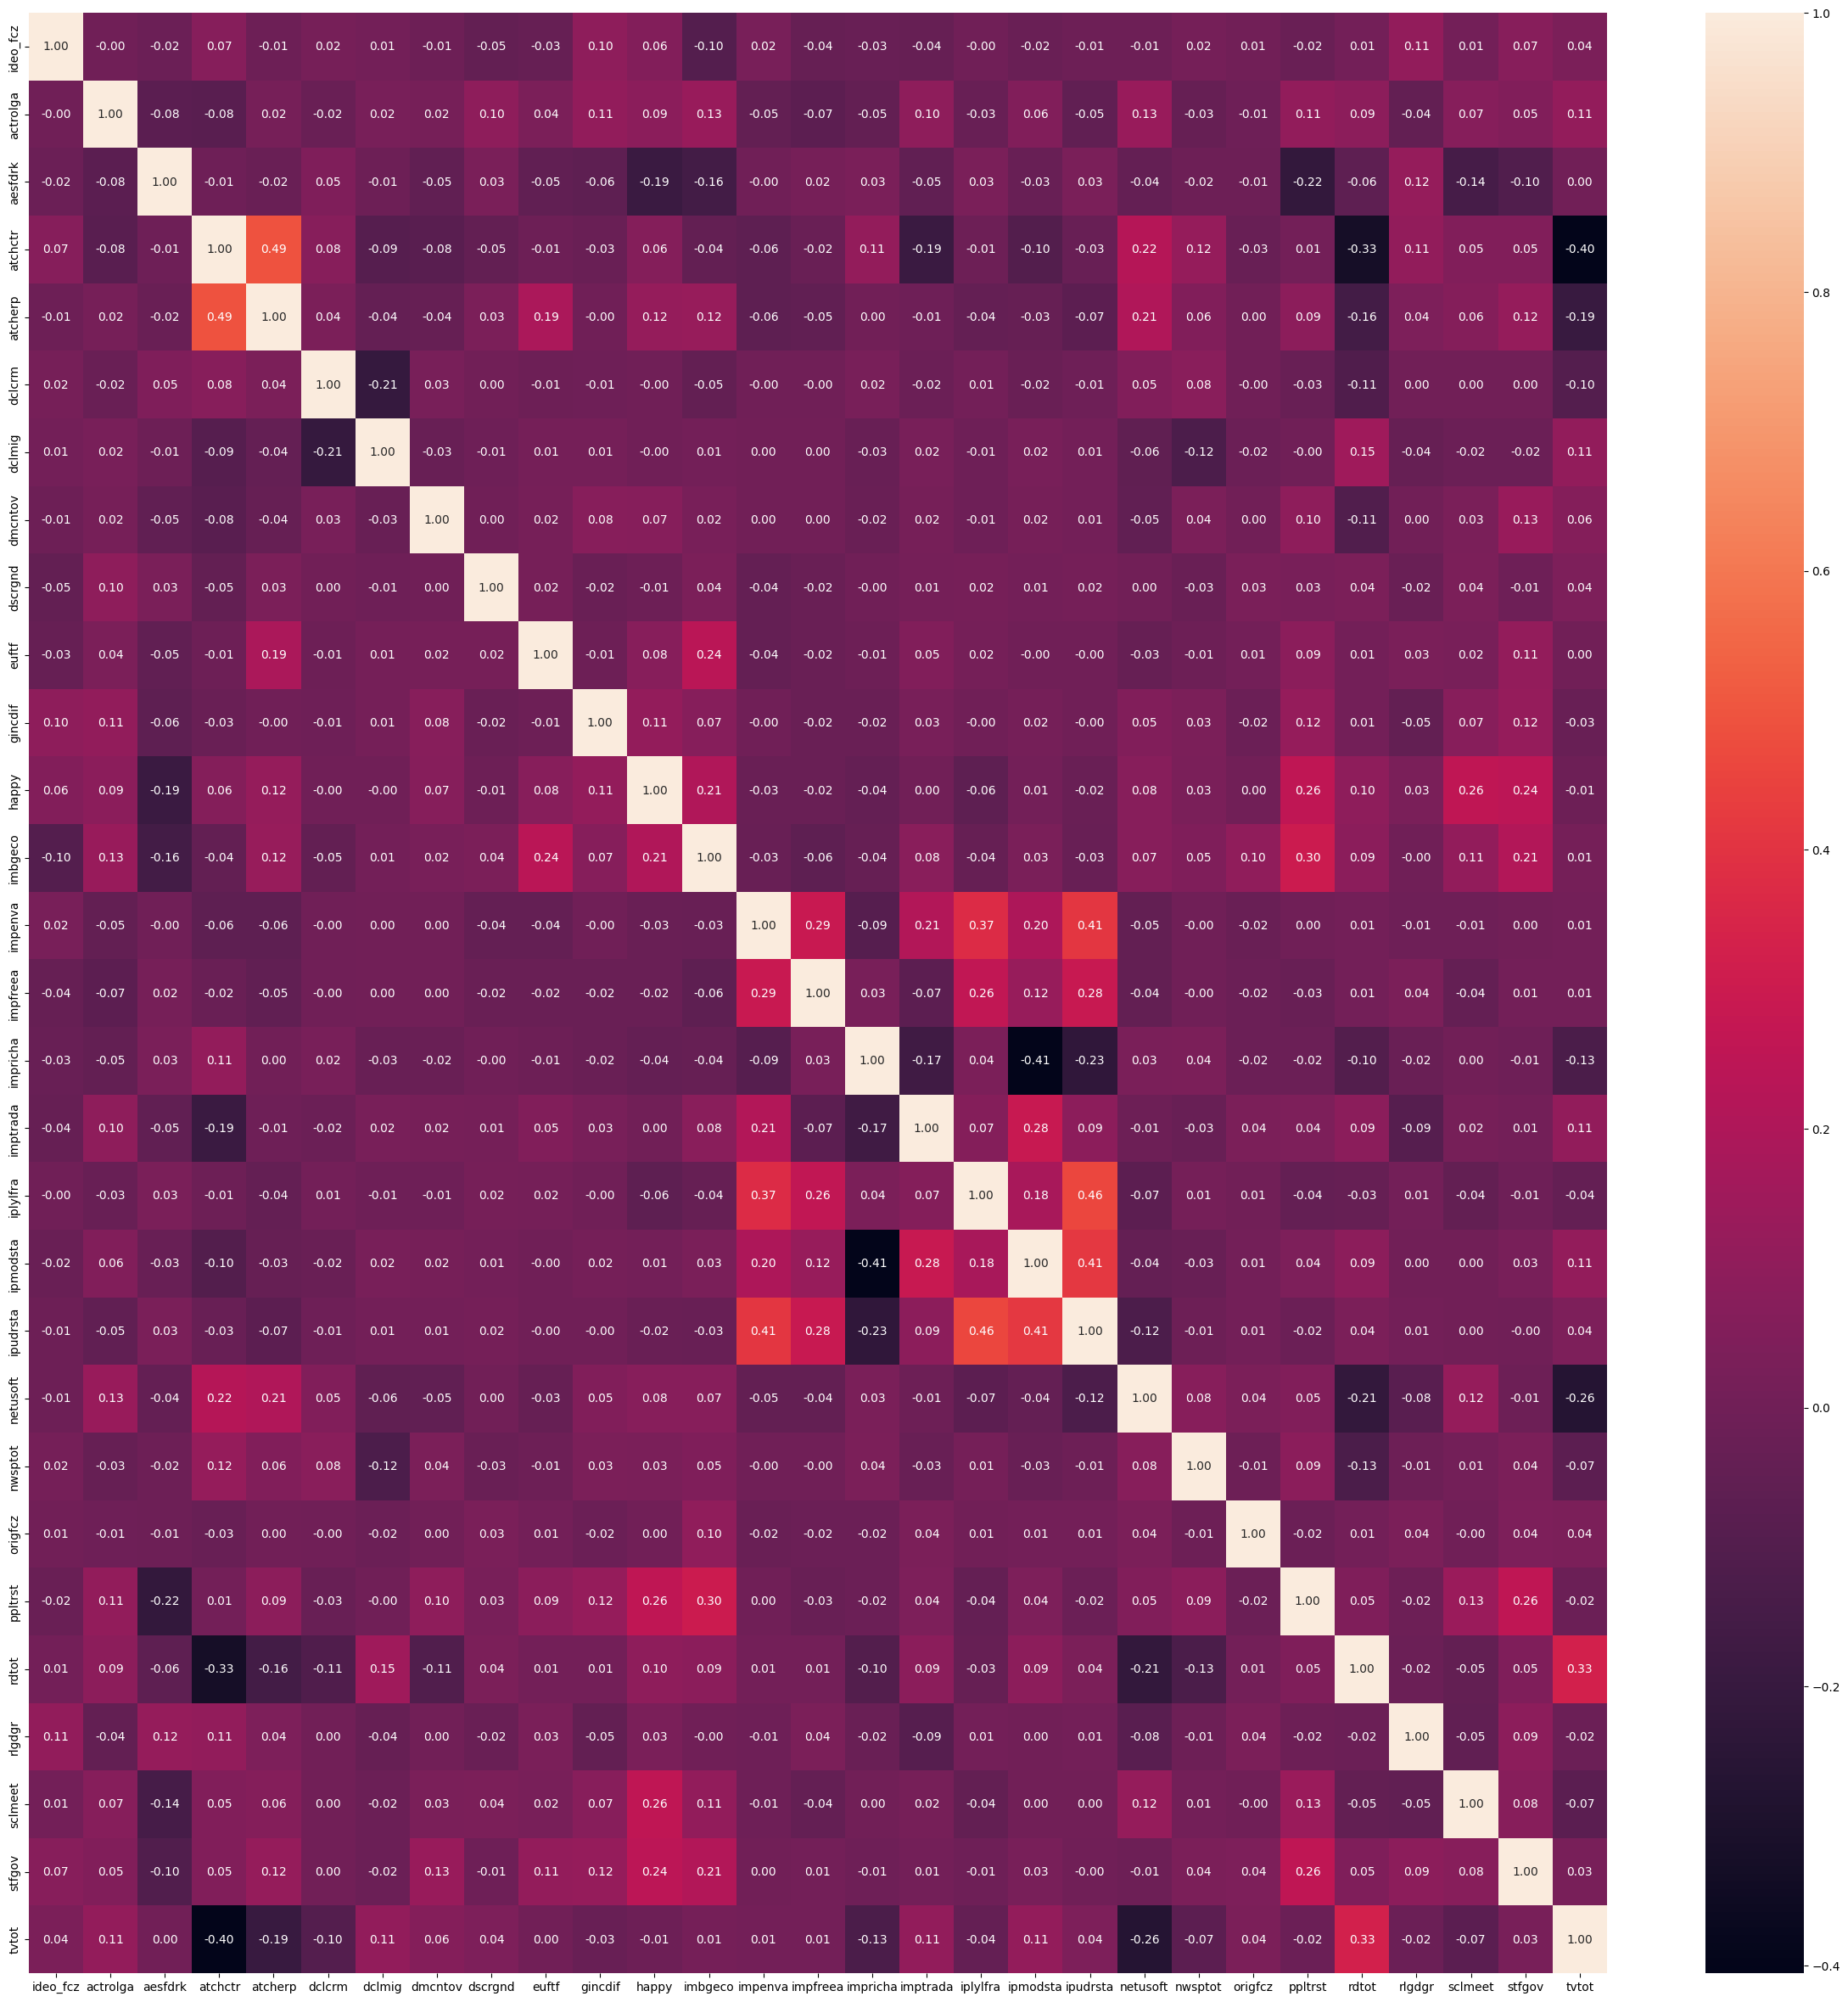

In [28]:
#Vamos a realizar una matriz de correlacion, para ver las relaciones, positivas y negativas entre variables.
#Matriz de correlacion EU.

target_var = "ideo_fcz"
dfeu1 = dfeu.drop(columns=['ideo']) 
df_heatmap = dfeu1.reindex(columns=[target_var] + list(dfeu1.columns.difference([target_var])))
plt.figure(figsize=(30, 30))
sns.heatmap(df_heatmap.corr(),annot=True, fmt=".2f")
plt.show()
'''mask=np.triu(df_heatmap.corr())'''
del df_heatmap

Conclusiones Analisis multivariable Eu, Grupo A, B y C:

3) Feature engineering:
3.1) Reduccion de variables a 16 + la variable target global = 17.
De esas 16, 13 seran con el selektkbest, tres seran a mi eleccion por criterios propios, para poder trabajar con ellas con otros modelos.
Variable target global =  ['ideo_fcz']
Variables a mi eleccion = ['ppltrst'],['sclmeet'],['iplylfra']
3.2) Modelo de etiquetacion sin variable target.
3.3) Modelo de clasificacion para mi variable target global categórica factorizada(como todo el conjunto de datos.)
3.4) Especificaciones por agrupaciones de paises EU, Grupo A, Grupo B y Grupo C
3.5) Implementacion de mis modelos a una app de Streamlit

In [29]:
#3.1) Feature engineering. Split train test dataset 29 variables. Compararemos a posteriori los scores con el dataset a 16 variables.
# Divide los datos en conjunto de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

X_29= dfeu1.copy().drop('ideo_fcz', axis=1)
y_29 = dfeu1.copy()['ideo_fcz']
X_29tr, X_29t, y_29tr, y_29t = train_test_split(X_29, y_29, test_size=0.2, random_state=rng)

# Guardo los splits del dataset europeo a 30 variables
X_29tr.to_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29tr.csv", index=False)
X_29t.to_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29t.csv", index=False) 
y_29tr.to_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29tr.csv", index=False)
y_29t.to_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29t.csv", index=False)
dfeu1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, 27720 to 70861
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   netusoft  2700 non-null   float64
 1   nwsptot   2700 non-null   float64
 2   ppltrst   2700 non-null   int64  
 3   rdtot     2700 non-null   float64
 4   tvtot     2700 non-null   float64
 5   actrolga  2700 non-null   float64
 6   dclcrm    2700 non-null   float64
 7   dclmig    2700 non-null   float64
 8   dmcntov   2700 non-null   float64
 9   euftf     2700 non-null   float64
 10  gincdif   2700 non-null   int64  
 11  ideo_fcz  2700 non-null   int64  
 12  imbgeco   2700 non-null   int64  
 13  stfgov    2700 non-null   float64
 14  aesfdrk   2700 non-null   int64  
 15  atchctr   2700 non-null   float64
 16  atcherp   2700 non-null   float64
 17  dscrgnd   2700 non-null   int64  
 18  happy     2700 non-null   int64  
 19  rlgdgr    2700 non-null   int64  
 20  sclmeet   2700 non-null   int6

In [61]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import os

# --- Carga de datos ---
X_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29tr.csv")
y_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29tr.csv").squeeze()
X_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29t.csv")
y_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29t.csv").squeeze()

# --- Depuración y preprocesamiento de X_29tr ---
print("Depuración y preprocesamiento de X_29tr:")

# 1. Revisión de tipos de datos y conversión a numérico
print("\nTipos de datos de X_29tr (antes de la conversión):")
print(X_29tr.dtypes)

for col in X_29tr.columns:
    if X_29tr[col].dtype == 'object':
        try:
            X_29tr[col] = pd.to_numeric(X_29tr[col])
            print(f"Columna '{col}' convertida a numérica.")
        except ValueError:
            print(f"Columna '{col}' es categórica. Aplicando one-hot encoding...")
            X_29tr = pd.get_dummies(X_29tr, columns=[col], drop_first=True)

print("\nTipos de datos de X_29tr (después de la conversión):")
print(X_29tr.dtypes)

# 2. Revisión de valores únicos (inspección visual)
print("\nValores únicos en X_29tr:")
for col in X_29tr.columns:
    print(f"Columna '{col}': {X_29tr[col].unique()}")

# 3. Imputación de NaN (si es necesario)
imputer = SimpleImputer(strategy='mean')
X_29tr_imputado = imputer.fit_transform(X_29tr)
X_29tr_imputado = pd.DataFrame(X_29tr_imputado, columns=X_29tr.columns)

# 4. Escalado de características (opcional)
scaler = StandardScaler() #Si quieres escalar
X_29tr_escalado = scaler.fit_transform(X_29tr_imputado) #Si quieres escalar
X_29tr_escalado = pd.DataFrame(X_29tr_escalado, columns=X_29tr_imputado.columns) #Si quieres escalar


# --- Depuración y preprocesamiento de y_29tr ---
print("\nDepuración y preprocesamiento de y_29tr:")

# 1. Revisión de tipos de datos y conversión a numérico
print("\nTipo de dato de y_29tr (antes de la conversión):")
print(y_29tr.dtype)

y_29tr = pd.to_numeric(y_29tr)

print("\nTipo de dato de y_29tr (después de la conversión):")
print(y_29tr.dtype)

# 2. Revisión de valores únicos
print("\nValores únicos en y_29tr:")
print(y_29tr.unique())

# --- Depuración y preprocesamiento de X_29t ---
print("\nDepuración y preprocesamiento de X_29t:")

# 1. Conversión de tipos (usando las mismas columnas que en X_29tr)
for col in X_29t.columns:
    if X_29t[col].dtype == 'object':
        try:
            X_29t[col] = pd.to_numeric(X_29t[col])
        except ValueError:
            print(f"Columna '{col}' es categórica. Aplicando one-hot encoding (igual que en X_29tr)...")
            X_29t = pd.get_dummies(X_29t, columns=[col], drop_first=True)

# Alinear las columnas de X_29t con X_29tr después del one-hot encoding
X_29t = X_29t.reindex(columns=X_29tr.columns, fill_value=0)

# 2. Imputación (usando el mismo imputer que para X_29tr)
X_29t_imputado = imputer.transform(X_29t)
X_29t_imputado = pd.DataFrame(X_29t_imputado, columns=X_29t.columns)

# 3. Escalado (usando el mismo scaler que para X_29tr, opcional)
X_29t_escalado = scaler.transform(X_29t_imputado) #Si quieres escalar
X_29t_escalado = pd.DataFrame(X_29t_escalado, columns=X_29t_imputado.columns) #Si quieres escalar

# --- Depuración y preprocesamiento de y_29t ---
print("\nDepuración y preprocesamiento de y_29t:")

# 1. Revisión de tipos de datos y conversión a numérico
print("\nTipo de dato de y_29t (antes de la conversión):")
print(y_29t.dtype)

y_29t = pd.to_numeric(y_29t)

print("\nTipo de dato de y_29t (después de la conversión):")
print(y_29t.dtype)

# 2. Revisión de valores únicos
print("\nValores únicos en y_29t:")
print(y_29t.unique())

# --- Sobreescritura segura de archivos CSV ---

# Define las rutas de los nuevos archivos
ruta_X_29tr_limpio = "C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29trstd.csv"
ruta_y_29tr_limpio = "C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29trstd.csv"
ruta_X_29t_limpio = "C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29tstd.csv"
ruta_y_29t_limpio = "C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29tstd.csv"

# Guarda los DataFrames limpios en los nuevos archivos
X_29tr_escalado.to_csv(ruta_X_29tr_limpio, index=False) #Si quieres escalar
y_29tr.to_csv(ruta_y_29tr_limpio, index=False)
X_29t_escalado.to_csv(ruta_X_29t_limpio, index=False) #Si quieres escalar
y_29t.to_csv(ruta_y_29t_limpio, index=False)

print(f"\nArchivo X_29tr limpio guardado en: {ruta_X_29tr_limpio}")
print(f"Archivo y_29tr limpio guardado en: {ruta_y_29tr_limpio}")
print(f"Archivo X_29t limpio guardado en: {ruta_X_29t_limpio}")
print(f"Archivo y_29t limpio guardado en: {ruta_y_29t_limpio}")

# --- En scripts futuros, carga los datos limpios de la siguiente manera: ---
# X_29tr = pd.read_csv(ruta_X_29tr_limpio)
# y_29tr = pd.read_csv(ruta_y_29tr_limpio, squeeze=True)
# X_29t = pd.read_csv(ruta_X_29t_limpio)
# y_29t = pd.read_csv(ruta_y_29t_limpio, squeeze=True)

Depuración y preprocesamiento de X_29tr:

Tipos de datos de X_29tr (antes de la conversión):
Unnamed: 0      int64
netusoft      float64
nwsptot       float64
ppltrst         int64
rdtot         float64
tvtot         float64
actrolga      float64
dclcrm        float64
dclmig        float64
dmcntov       float64
euftf         float64
gincdif         int64
imbgeco         int64
stfgov        float64
aesfdrk         int64
atchctr       float64
atcherp       float64
dscrgnd         int64
happy           int64
rlgdgr          int64
sclmeet         int64
origfcz         int64
iplylfra      float64
impenva       float64
impfreea      float64
impricha      float64
imptrada      float64
ipmodsta      float64
ipudrsta      float64
dtype: object

Tipos de datos de X_29tr (después de la conversión):
Unnamed: 0      int64
netusoft      float64
nwsptot       float64
ppltrst         int64
rdtot         float64
tvtot         float64
actrolga      float64
dclcrm        float64
dclmig        float64
dmc

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import os
X_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29tr.csv")
X_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29t.csv")
y_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29tr.csv").squeeze() #se reduce la dimensionalidad a array 1D, para evitar errores de compatibilidad
y_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29t.csv").squeeze()

#Características (solo en X_29tr, en el conjunto de entrenamiento.)
selector = SelectKBest(chi2, k=12)  # Ajusta 'k' a tu necesidad
X_29tr_selected = selector.fit_transform(X_29tr, y_29tr)





#Crear los DataFrames finales (CON LAS 16 VARIABLES)
X_16tr = pd.DataFrame(X_29tr_selected, columns=selected_features_kbest)
y_16tr = y_29tr
X_16t = X_29t_selected
y_16t = y_29t
#Guardo en csv los split train test a 16
X_16tr.to_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16tr.csv", index=False)
X_16t.to_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16t.csv", index=False) 
y_16tr.to_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16tr.csv", index=False)
y_16t.to_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16t.csv", index=False)
# --- Carga de datos ---
X_16tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16tr.csv")
y_16tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16tr.csv").squeeze()
X_16t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16t.csv")
y_16t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16t.csv").squeeze()

# --- Depuración y preprocesamiento de X_16tr ---
print("Depuración y preprocesamiento de X_16tr:")

# 1. Revisión de tipos de datos y conversión a numérico
print("\nTipos de datos de X_16tr (antes de la conversión):")
print(X_16tr.dtypes)

for col in X_16tr.columns:
    if X_16tr[col].dtype == 'object':
        try:
            X_16tr[col] = pd.to_numeric(X_16tr[col])
            print(f"Columna '{col}' convertida a numérica.")
        except ValueError:
            print(f"Columna '{col}' es categórica. Aplicando one-hot encoding...")
            X_16tr = pd.get_dummies(X_16tr, columns=[col], drop_first=True)

print("\nTipos de datos de X_16tr (después de la conversión):")
print(X_16tr.dtypes)

# 2. Revisión de valores únicos (inspección visual)
print("\nValores únicos en X_16tr:")
for col in X_16tr.columns:
    print(f"Columna '{col}': {X_16tr[col].unique()}")

# 3. Imputación de NaN (si es necesario)
imputer_16 = SimpleImputer(strategy='mean')
X_16tr_imputado = imputer_16.fit_transform(X_16tr)
X_16tr_imputado = pd.DataFrame(X_16tr_imputado, columns=X_16tr.columns)

# 4. Escalado de características (opcional)
scaler_16 = StandardScaler()
X_16tr_escalado = scaler_16.fit_transform(X_16tr_imputado)
X_16tr_escalado = pd.DataFrame(X_16tr_escalado, columns=X_16tr_imputado.columns)

# --- Depuración y preprocesamiento de y_16tr ---
print("\nDepuración y preprocesamiento de y_16tr:")

# 1. Revisión de tipos de datos y conversión a numérico
print("\nTipo de dato de y_16tr (antes de la conversión):")
print(y_16tr.dtype)

y_16tr = pd.to_numeric(y_16tr)

print("\nTipo de dato de y_16tr (después de la conversión):")
print(y_16tr.dtype)

# 2. Revisión de valores únicos
print("\nValores únicos en y_16tr:")
print(y_16tr.unique())

# --- Depuración y preprocesamiento de X_16t ---
print("\nDepuración y preprocesamiento de X_16t:")

# 1. Conversión de tipos (usando las mismas columnas que en X_16tr)
for col in X_16t.columns:
    if X_16t[col].dtype == 'object':
        try:
            X_16t[col] = pd.to_numeric(X_16t[col])
        except ValueError:
            print(f"Columna '{col}' es categórica. Aplicando one-hot encoding (igual que en X_16tr)...")
            X_16t = pd.get_dummies(X_16t, columns=[col], drop_first=True)

# Alinear las columnas de X_16t con X_16tr después del one-hot encoding
X_16t = X_16t.reindex(columns=X_16tr.columns, fill_value=0)

# 2. Imputación (usando el mismo imputer que para X_16tr)
X_16t_imputado = imputer_16.transform(X_16t)
X_16t_imputado = pd.DataFrame(X_16t_imputado, columns=X_16t.columns)

# 3. Escalado (usando el mismo scaler que para X_16tr, opcional)
X_16t_escalado = scaler_16.transform(X_16t_imputado)
X_16t_escalado = pd.DataFrame(X_16t_escalado, columns=X_16t_imputado.columns)

# --- Depuración y preprocesamiento de y_16t ---
print("\nDepuración y preprocesamiento de y_16t:")

# 1. Revisión de tipos de datos y conversión a numérico
print("\nTipo de dato de y_16t (antes de la conversión):")
print(y_16t.dtype)

y_16t = pd.to_numeric(y_16t)

print("\nTipo de dato de y_16t (después de la conversión):")
print(y_16t.dtype)

# 2. Revisión de valores únicos
print("\nValores únicos en y_16t:")
print(y_16t.unique())

# --- Sobreescritura segura de archivos CSV ---

# Define las rutas de los nuevos archivos
ruta_X_16tr_limpio = "C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16trstd.csv"
ruta_y_16tr_limpio = "C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16trstd.csv"
ruta_X_16t_limpio = "C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16tstd.csv"
ruta_y_16t_limpio = "C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16tstd.csv"

# Guarda los DataFrames limpios en los nuevos archivos
X_16tr_escalado.to_csv(ruta_X_16tr_limpio, index=False)
y_16tr.to_csv(ruta_y_16tr_limpio, index=False)
X_16t_escalado.to_csv(ruta_X_16t_limpio, index=False)
y_16t.to_csv(ruta_y_16t_limpio, index=False)

print(f"\nArchivo X_16tr limpio guardado en: {ruta_X_16tr_limpio}")
print(f"Archivo y_16tr limpio guardado en: {ruta_y_16tr_limpio}")
print(f"Archivo X_16t limpio guardado en: {ruta_X_16t_limpio}")
print(f"\nArchivo y_16t limpio guardado en: {ruta_y_16t_limpio}")

# --- En scripts futuros, carga los datos limpios de la siguiente manera: ---
# X_16tr = pd.read_csv(ruta_X_16tr_limpio)
# y_16tr = pd.read_csv(ruta_y_16tr_limpio, squeeze=True)
# X_16t = pd.read_csv(ruta_X_16t_limpio)
# y_16t = pd.read_csv(ruta_y_16t_limpio, squeeze=True

AttributeError: 'list' object has no attribute 'tolist'

In [63]:
#Ya que tenemos todo lo necesario para entrenar Borramos todo lo que hay en la cache.
%reset -f


NameError: name 'X_16t_escalado' is not defined

In [ ]:
#Randomforest con 29 variables por defecto:
from sklearn.feature_selection import SelectKBest, chi2  # O tu método preferido
from sklearn.ensemble import RandomForestClassifier  # O tu modelo preferido
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import os
print("Entrenamiento y evaluación con 29 variables:")
X_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29trstd.csv")
X_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29tstd.csv")
y_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29trstd.csv").squeeze() #se reduce la dimensionalidad a array 1D, para evitar errores de compatibilidad
y_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29tstd.csv").squeeze()
model_29 = RandomForestClassifier(random_state=42)  # O tu modelo preferido
model_29.fit(X_29tr, y_29tr)

y_pred_29 = model_29.predict(X_29t)

average = 'weighted'
y_prob_29 = model_29.predict_proba(X_29t)
auc_roc_29 = roc_auc_score(y_29t, y_prob_29, multi_class="ovr", average="weighted")
print("AUC-ROC (29 variables):", auc_roc_29) #No difiere mucho de un modelo al azar si este es cercano a 0.5
print("Precisión (29 variables):", precision_score(y_29t, y_pred_29, average=average)) #Si es inferior al 0.5 indica que el modelo tiene buena capacidad para identificar falsos positivos.
print("Recall (29 variables):", recall_score(y_29t, y_pred_29, average=average)) # Si es superior al 0.5 indica que el modelo tiene buena capacidad para identificar falsos negativos
print("F1-score (29 variables):", f1_score(y_29t, y_pred_29, average=average)) #Superior al 0.5 sugiere que el modelo entre su precision y recall hay correlatividad positva.

Entrenamiento y evaluación con 29 variables:
AUC-ROC (29 variables): 0.6101810983491956
Precisión (29 variables): 0.5272338874307378
Recall (29 variables): 0.5981481481481481
F1-score (29 variables): 0.48594689692542625


In [66]:
#Modelo randomforest por defecto 16 variables:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # O tu modelo preferido
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import os

print("Entrenamiento y evaluación con 16 variables:")
X_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16trstd.csv")
X_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16tstd.csv")
y_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16trstd.csv").squeeze() #se reduce la dimensionalidad a array 1D, para evitar errores de compatibilidad
y_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16tstd.csv").squeeze()
#Entrenamiento del modelo
model = RandomForestClassifier(random_state=42)  # O tu modelo preferido
model.fit(X_16tr, y_16tr)

#Predicciones en el conjunto de prueba
y_pred = model.predict(X_16t)

#Evaluación del modelo

average = 'weighted'  # O 'macro', 'micro', según tu necesidad
y_prob_16 = model.predict_proba(X_16t)
auc_roc_16 = roc_auc_score(y_16t, y_prob_16, multi_class="ovr", average="weighted")
print("AUC-ROC (29 variables):", auc_roc_16) #No difiere mucho de un modelo al azar si este es cercano a 0.5
print("Precisión:", precision_score(y_16t, y_pred, average=average))
print("Recall:", recall_score(y_16t, y_pred, average=average))
print("F1-score:", f1_score(y_16t, y_pred, average=average))
del X_29tr, X_29t, y_29tr, y_29t, X_29tr_to16, X_29t_to16, y_29tr_to16, y_29t_to16

Entrenamiento y evaluación con 16 variables:


FileNotFoundError: [Errno 2] No such file or directory: 'C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16trstd.csv'

3.1) Vemos que nuestro RandomForest consigue algo en los scores con variables reducidas a 16. No mucho pero algo gana, ahora debemos parametrizar el modelo y guardar el mejor para su uso de clasificacion. Tambien podemos jugar con el numero de variables.

In [43]:
#Hiperparametrizacion XGBOOST. 29 variables. usando como metrica en el motor del modelo f1-score
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import os
import pickle
mapping = {1: 0, 2: 1, 3: 2}
X_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29tr.csv")
X_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29t.csv")
y_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29tr.csv").squeeze()
y_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29t.csv").squeeze()


y_29tr = y_29tr.map(mapping)
y_29t = y_29t.map(mapping)


model_xgb_29 = XGBClassifier(eval_metric='mlogloss', random_state=42)

# 3. Definir la grilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# 4. Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(model_xgb_29, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_29tr, y_29tr)

# 5. Obtener el mejor modelo
best_model_xgb_29 = grid_search.best_estimator_

# 6. Realizar predicciones en el conjunto de prueba
y_pred_xgb_29 = best_model_xgb_29.predict(X_29t)

# 7. Evaluar el mejor modelo
average = 'weighted'

print("Precisión (29 variables, XGBoost):", precision_score(y_29t, y_pred_xgb_29, average=average))
print("Recall (29 variables, XGBoost):", recall_score(y_29t, y_pred_xgb_29, average=average))
print("F1-score (29 variables, XGBoost):", f1_score(y_29t, y_pred_xgb_29, average=average))

# AUC-ROC para multiclase (One-vs-Rest)
y_prob_xgb_29 = best_model_xgb_29.predict_proba(X_29t)
auc_roc_xgb_29 = roc_auc_score(y_29t, y_prob_xgb_29, multi_class="ovr", average="weighted")
print("AUC-ROC (29 variables, XGBoost):", auc_roc_xgb_29)

# 8. Guardar el modelo con 29 variables (con directorio y nombre personalizables)

# Solicitar al usuario el directorio y nombre del archivo (con valores por defecto)
directorio_29 = "C:/GitHubRepos/ProyectoFinal/data/models"
nombre_archivo_29 = 'F1GSRF29.pkl'

# Crear el directorio si no existe
if not os.path.exists(directorio_29):
    os.makedirs(directorio_29)

ruta_completa_29 = os.path.join(directorio_29, nombre_archivo_29)
pickle.dump(best_model_xgb_29, open(ruta_completa_29, 'wb'))

print(f"Modelo guardado en: {ruta_completa_29}")
del X_29tr, X_29t, y_29tr, y_29t,


Precisión (29 variables, XGBoost): 0.49481155520179915
Recall (29 variables, XGBoost): 0.5666666666666667
F1-score (29 variables, XGBoost): 0.5029165429453265
AUC-ROC (29 variables, XGBoost): 0.6177187298968544
Modelo guardado en: C:/GitHubRepos/ProyectoFinal/data/models\F1GSRF29.pkl


c:\GitHubRepos\ProyectoFinal\.FPJBGPCSobremesa-env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast



In [44]:
#Hiperparametrizacion XGBOOST. 16 variables. usando como metrica en el motor del modelo f1-score
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2  # If you're still using feature selection
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import os
import pickle

# Load the 16-variable data
X_16tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16tr.csv")
X_16t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16t.csv")
y_16tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16tr.csv").squeeze()
y_16t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16t.csv").squeeze()

# Remap the target variable (important!)
mapping = {1: 0, 2: 1, 3: 2}
y_16tr = y_16tr.map(mapping)
y_16t = y_16t.map(mapping)


model_xgb_to16 = XGBClassifier(eval_metric='mlogloss', random_state=42)

param_grid = {
    'n_estimators': [150, 250, 400],
    'max_depth': [4,8],
    'learning_rate': [0.01, 0.05, 0.15],
    'gamma': [0.01, 0.1, 0.5],
    'subsample': [0.4, 0.6, 0.8],
    'colsample_bytree': [0.5,0.7, 0.8, 0.9]
}
#Modificamos el grid search hasta encontrar mejores scores.
# 7. Perform hyperparameter search
grid_search_to16 = GridSearchCV(model_xgb_to16, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)

grid_search_to16.fit(X_16tr, y_16tr)  # Use the 16-variable data here!

# 8. Get the best model
best_model_xgb_to16 = grid_search_to16.best_estimator_

# 9. Make predictions
y_pred_xgb_to16 = best_model_xgb_to16.predict(X_16t)  # Predict on the 16-variable test set

# 10. Evaluate the model
average = 'weighted'
print("Precisión (16 variables, XGBoost):", precision_score(y_16t, y_pred_xgb_to16, average=average))
print("Recall (16 variables, XGBoost):", recall_score(y_16t, y_pred_xgb_to16, average=average))
print("F1-score (16 variables, XGBoost):", f1_score(y_16t, y_pred_xgb_to16, average=average))

# AUC-ROC
y_prob_xgb_to16 = best_model_xgb_to16.predict_proba(X_16t)
auc_roc_xgb_to16 = roc_auc_score(y_16t, y_prob_xgb_to16, multi_class="ovr", average="weighted")
print("AUC-ROC (16 variables, XGBoost):", auc_roc_xgb_to16)

# 11. Save the model
directorio_16 = "C:/GitHubRepos/ProyectoFinal/data/models"
nombre_archivo_16 = "F1GSRF16.pkl"

if not os.path.exists(directorio_16):
    os.makedirs(directorio_16)

ruta_completa_16 = os.path.join(directorio_16, nombre_archivo_16)
pickle.dump(best_model_xgb_to16, open(ruta_completa_16, 'wb'))

print(f"Modelo guardado en: {ruta_completa_16}")
del X_16tr, X_16t, y_16tr, y_16t

Precisión (16 variables, XGBoost): 0.5166360153256705
Recall (16 variables, XGBoost): 0.5833333333333334
F1-score (16 variables, XGBoost): 0.5046813894639981
AUC-ROC (16 variables, XGBoost): 0.6233340211880746
Modelo guardado en: C:/GitHubRepos/ProyectoFinal/data/models\F1GSRF16.pkl


In [54]:
X_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29tr.csv")
print(X_29tr.isnull().sum())  # Suma de NaN por columna
print(X_29tr.isna().any().any()) #Verifica si hay algún NaN en el dataframe
for col in X_29tr.columns:
    if X_29tr[col].dtype == 'object':
        print(f"Columna '{col}' es de tipo 'object'. Convirtiendo...")
        X_29tr = pd.get_dummies(X_29tr, columns=[col], drop_first=True) #One-hot encoding y drop_first para evitar multicolinealidad

print(X_29tr.dtypes) #Verifica que se hayan convertido
for col in X_29tr.columns:
    if X_29tr[col].dtype == 'object': #Si aun hay columnas object
        try:
            X_29tr[col] = pd.to_numeric(X_29tr[col])
        except ValueError: #Si no se puede convertir a numérico, es probablemente categórica.
            X_29tr = pd.get_dummies(X_29tr, columns=[col], drop_first=True)  # One-hot encoding

print(X_29tr.dtypes) #Verifica que se hayan convertido
X_29tr.to_csv('C:\GitHubRepos\ProyectoFinal\data\processed\dfeu29\X_29tr.csv')

netusoft    float64
nwsptot     float64
ppltrst       int64
rdtot       float64
tvtot       float64
actrolga    float64
dclcrm      float64
dclmig      float64
dmcntov     float64
euftf       float64
gincdif       int64
imbgeco       int64
stfgov      float64
aesfdrk       int64
atchctr     float64
atcherp     float64
dscrgnd       int64
happy         int64
rlgdgr        int64
sclmeet       int64
origfcz       int64
iplylfra    float64
impenva     float64
impfreea    float64
impricha    float64
imptrada    float64
ipmodsta    float64
ipudrsta    float64
dtype: object


In [56]:
#Utilizaremos otra metrica AUC-SCore, para el rendimiento del modelo de clasificacion , ademaas utilizaremos randomsearch com punto de partida.
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, make_scorer  # Import make_scorer
import os
import pickle


X_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29tr.csv")
X_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/X_29t.csv")
y_29tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29tr.csv").squeeze()
y_29t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu29/y_29t.csv").squeeze()

mapping = {1: 0, 2: 1, 3: 2}
y_29tr = y_29tr.map(mapping)
y_29t = y_29t.map(mapping)



model_xgb_29 = XGBClassifier(eval_metric='mlogloss', random_state=42)

param_grid_29 = {  
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01,0.05, 0.1, 0.15],
    'gamma': [0, 0.05, 0.1, 0.5],
    'subsample': [0.4,0.6, 0.8],
    'colsample_bytree': [0.5,0.7, 0.9],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1,0.5, 1]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring29 = {
    'auc': make_scorer(roc_auc_score, multi_class="ovr", average="weighted"),
    'f1': make_scorer(f1_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted')
}
random_search_29 = RandomizedSearchCV(
    model_xgb_29,
    param_grid_29,
    n_iter=20,  # Ajusta el número de iteraciones
    scoring=scoring29,  # Usar el diccionario de métricas
    cv=cv,
    refit='auc',  # Refinar el modelo usando AUC-ROC
    n_jobs=-1,
    verbose=1,
    return_train_score=True, #Incluir el score de entrenamiento
    random_state=42
)

random_search_29.fit(X_29tr, y_29tr)

best_model_xgb_29 = random_search_29.best_estimator_

directorio_29 = "C:/GitHubRepos/ProyectoFinal/data/models"
nombre_archivo_29 = "ARSRF29.pkl"

if not os.path.exists(directorio_29):
    os.makedirs(directorio_29)

ruta_completa_29 = os.path.join(directorio_29, nombre_archivo_29)
pickle.dump(best_model_xgb_29, open(ruta_completa_29, 'wb'))

print(f"Modelo guardado en: {ruta_completa_29}")
random_search_29.fit(X_29tr, y_29tr)
best_model_xgb_29 = random_search_29.best_estimator_
resultados_29 = pd.DataFrame(random_search_29.cv_results_)
mejor_indice_29 = resultados_29['mean_test_auc'].idxmax()
mejores_parametros_29 = resultados_29.loc[mejor_indice_29, 'params']
mejor_auc_29 = resultados_29.loc[mejor_indice_29, 'mean_test_auc']
mejor_f1_29 = resultados_29.loc[mejor_indice_29, 'mean_test_f1']
mejor_precision_29 = resultados_29.loc[mejor_indice_29, 'mean_test_precision']
mejor_recall_29 = resultados_29.loc[mejor_indice_29, 'mean_test_recall']
print("Modelo con 29 variables:")
print(f"Mejores parámetros: {mejores_parametros_29}")
print(f"Mejor AUC: {mejor_auc_29}")
print(f"Mejor F1: {mejor_f1_29}")
print(f"Mejor Precision: {mejor_precision_29}")
print(f"Mejor Recall: {mejor_recall_29}")
del X_29tr, X_29t, y_29tr, y_29t,



Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\GitHubRepos\ProyectoFinal\.FPJBGPCSobremesa-env\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]

c:\GitHubRepos\ProyectoFinal\.FPJBGPCSobremesa-env\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning:

One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]



Modelo guardado en: C:/GitHubRepos/ProyectoFinal/data/models\ARSRF29.pkl
Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\GitHubRepos\ProyectoFinal\.FPJBGPCSobremesa-env\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]

c:\GitHubRepos\ProyectoFinal\.FPJBGPCSobremesa-env\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning:

One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]

C:\Users\Josue\AppData\Local\Temp\ipykernel_16928\4281950839.py:71: FutureWarning:

The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



KeyError: nan

In [41]:
#modelo 16 variables, metrica auc roc
X_16tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16tr.csv")
X_16t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/X_16t.csv")
y_16tr = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16tr.csv").squeeze()
y_16t = pd.read_csv("C:/GitHubRepos/ProyectoFinal/data/processed/dfeu16/y_16t.csv").squeeze()
y_16tr = y_16tr.map(mapping)
y_16t = y_16t.map(mapping)

model_xgb_16 = XGBClassifier(eval_metric='mlogloss', random_state=42)
scoring16 = {
    'auc': make_scorer(roc_auc_score, multi_class="ovr", average="weighted"),
    'f1': make_scorer(f1_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted')
}
param_grid_16 = { 
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01,0.05, 0.1, 0.15],
    'gamma': [0, 0.05, 0.1, 0.5],
    'subsample': [0.4,0.6, 0.8],
    'colsample_bytree': [0.5,0.7, 0.9],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1,0.5, 1]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search_16 = RandomizedSearchCV(
    model_xgb_29,
    param_grid_29,
    n_iter=20,  # Ajusta el número de iteraciones
    scoring=scoring16,  # Usar el diccionario de métricas
    cv=cv,
    refit='auc',  # Refinar el modelo usando AUC-ROC (CORREGIDO)
    n_jobs=-1,
    verbose=1,
    return_train_score=True, #Incluir el score de entrenamiento
    random_state=42
)
random_search_16.fit(X_16tr, y_16tr)
best_model_xgb_16 = random_search_16.best_estimator_
directorio_16 = "C:/GitHubRepos/ProyectoFinal/data/models"
nombre_archivo_16 = "ARSRF16.pkl"
if not os.path.exists(directorio_16):
    os.makedirs(directorio_16)
ruta_completa_16 = os.path.join(directorio_16, nombre_archivo_16)
pickle.dump(best_model_xgb_to16, open(ruta_completa_16, 'wb'))
print(f"Modelo guardado en: {ruta_completa_16}")
random_search_16.fit(X_16tr, y_16tr)
best_model_xgb_16 = random_search_16.best_estimator_
resultados_16 = pd.DataFrame(random_search_16.cv_results_)
mejor_indice_16 = resultados_16['mean_test_auc'].idxmax()
mejores_parametros_16 = resultados_16.loc[mejor_indice_16, 'params']
mejor_auc_16 = resultados_16.loc[mejor_indice_16, 'mean_test_auc']
mejor_f1_16 = resultados_16.loc[mejor_indice_16, 'mean_test_f1']
mejor_precision_16 = resultados_16.loc[mejor_indice_16, 'mean_test_precision']
mejor_recall_16 = resultados_16.loc[mejor_indice_16, 'mean_test_recall']
print("\nModelo con 16 variables:")
print(f"Mejores parámetros: {mejores_parametros_16}")
print(f"Mejor AUC: {mejor_auc_16}")
print(f"Mejor F1: {mejor_f1_16}")
print(f"Mejor Precision: {mejor_precision_16}")
print(f"Mejor Recall: {mejor_recall_16}")
del X_16tr, X_16t, y_16tr, y_16t


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Parámetros del modelo:
{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.7, 'device': None, 'early_stopping_rounds': No

ValueError: feature_names mismatch: ['ppltrst', 'tvtot', 'actrolga', 'euftf', 'gincdif', 'imbgeco', 'stfgov', 'aesfdrk', 'atchctr', 'dscrgnd', 'happy', 'rlgdgr', 'ppltrst.1', 'sclmeet', 'iplylfra'] ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
expected ppltrst.1, atchctr, actrolga, stfgov, gincdif, euftf, dscrgnd, imbgeco, tvtot, sclmeet, rlgdgr, iplylfra, happy, aesfdrk, ppltrst in input data
training data did not have the following fields: 7, 5, 0, 2, 13, 4, 6, 12, 9, 8, 1, 14, 3, 11, 10